In [ ]:
##Only for running on Colab to ensure reproducibility!
# from google.colab import drive
# drive.mount('/content/drive')
# cd drive/MyDrive/Masters-Thesis
## Using Conda
# !wget -c https://repo.anaconda.com/miniconda/Miniconda3-latest-Linux-x86_64.sh
# !bash Miniconda3-latest-Linux-x86_64.sh -b -f -p /usr/local
# import sys
# sys.path.append('/usr/local/lib/python3.8/site-packages')
# !conda env create -f environment.yml
## Using Virtual Env
# !pip install virtualenv
# !virtualenv thesis
# !source thesis/bin/activate
## !pip install -r requirements.txt

In [1]:
from src.utils import read_file_1d, plot_kpi2d, plot_kpi3d, read_file_2d

In [2]:
file_path = './data/raw/738561.65_PM180_HPIN_4layer_p4q2_doubleV_pitched_029_000004.xlsx'

### Plot Exploration of a Torque KPI

In [3]:
nn = read_file_1d(file_path, 'NN')
mgrenz= read_file_1d(file_path, 'Mgrenz')

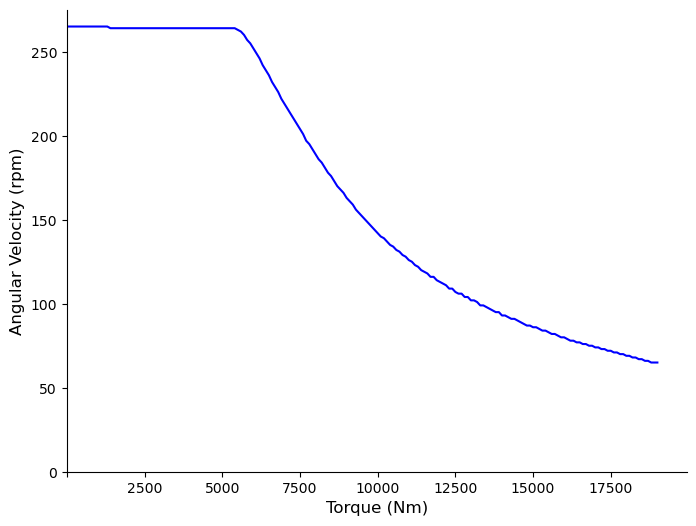

In [4]:
plot_kpi2d(nn, mgrenz)

### Plot Exploration of an Efficiency KPI

In [5]:
nn = read_file_1d(file_path, 'NN')
mm = read_file_1d(file_path, 'MM')
eta = read_file_2d(file_path, 'ETA')

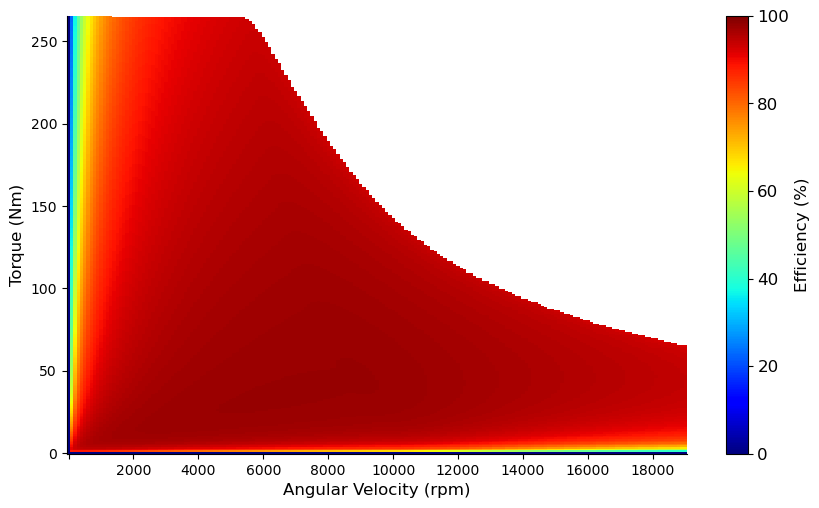

In [6]:
plot_kpi3d(nn, mm[-eta.shape[0]:], eta)

### Reading the tabular data

In [ ]:
import pandas as pd

In [ ]:
df_inputs=pd.read_csv('./data/TabularDataInputs.csv')

In [ ]:
# Set display options to show all columns
pd.set_option('display.max_columns', None)

# Show descriptive statistics for all columns, including non-numeric ones
df_inputs.describe(include='all')


In [ ]:
pd.reset_option('display.max_columns')

In [ ]:
df_inputs.info()

In [ ]:
df_targets=pd.read_csv('./data/TabularDataY1Targets.csv')

In [ ]:
df_targets

## Data Exploration

In [7]:
import pandas as pd
df_test_y1_targets = pd.read_pickle('./data/df_test_y1_targets.pkl') # Random Samples from entire dataset

/home/k64889/miniconda3/envs/thesis/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


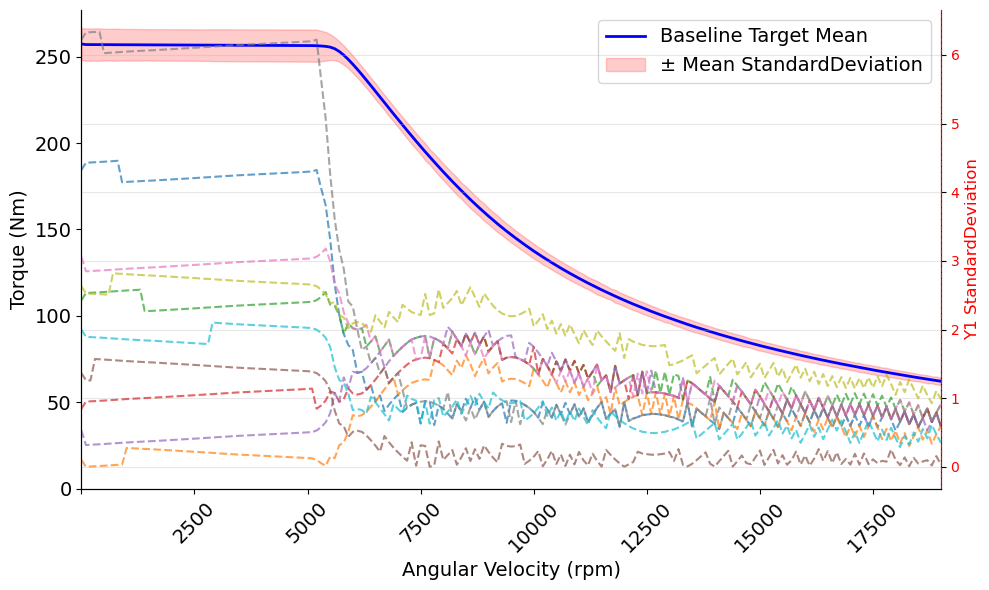

In [8]:
import numpy as np
import pandas as pd
from src.inference import plot_mgrenz_statistics

df_y1=pd.read_csv('./data/TabularDataY1Targets.csv')# Train + Test
df_y1.rename(columns={'Unnamed: 0':'filename'}, inplace=True)

df_y1_avg = df_y1.drop(columns=['filename']).mean()
df_y1_avg = df_y1_avg.to_frame(name='Average').transpose()

plot_mgrenz_statistics(df_y1_avg.iloc[:10], df_test_y1_targets.iloc[:10], plot = 'StandardDeviation', model= 'Baseline')

In [9]:
import numpy as np
y2_grid = np.load('./data/TabularDataETA.npy') # Train + Test
y2_grid_avg = np.nanmean(y2_grid, axis=0)

/tmp/ipykernel_203896/513595990.py:3: RuntimeWarning: Mean of empty slice
  y2_grid_avg = np.nanmean(y2_grid, axis=0)


In [10]:
import numpy as np

y2_test_grid = y2_grid[-50:, :, :] # Test set

speed_ranges = [20, 40, 60, 80, 100, 120, 140, 160, 180]

predicted_eta = []
mean_eta = []
std_eta = []
target_eta = []

for speed in speed_ranges:
    predicted_eta_speed = y2_grid_avg[:, speed]
    predicted_eta.append(predicted_eta_speed)

    target_eta_speed = [matrix[:, speed] for matrix in y2_test_grid]
    target_eta.append(target_eta_speed)
    
    eta_concatenated = np.concatenate(target_eta_speed)#Coz its list
    mean_eta.append(np.nanmean(eta_concatenated))
    std_eta.append(np.nanstd(eta_concatenated))


/home/k64889/Masters-Thesis/src/inference.py:473: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  plt.errorbar(speed_ranges, mean_eta, yerr=std_eta, fmt='o', capsize=5, label="Mean ± Standard Deviation", ecolor='red', linestyle='--', marker='s')


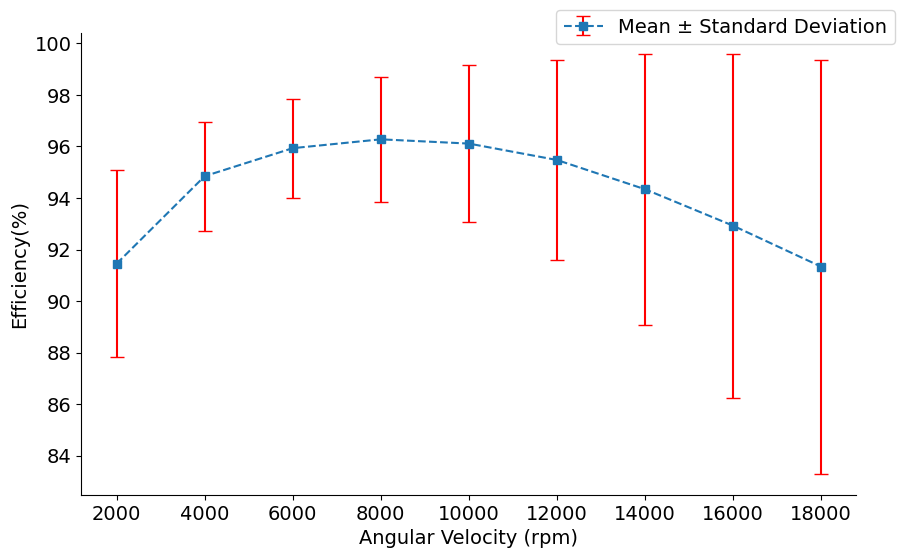

In [11]:
from src.inference import plot_eta_mean_statistics as plot_eta_mean_statistics
plot_eta_mean_statistics(speed_ranges, mean_eta, std_eta, 'Target')

/tmp/ipykernel_203896/1873898480.py:2: RuntimeWarning: Mean of empty slice
  y2_grid_test_avg = np.nanmean(y2_test_grid, axis=0)
/home/k64889/Masters-Thesis/src/inference.py:391: RuntimeWarning: Mean of empty slice
  rmse = (np.nanmean(squared_deviations, axis=0))**0.5


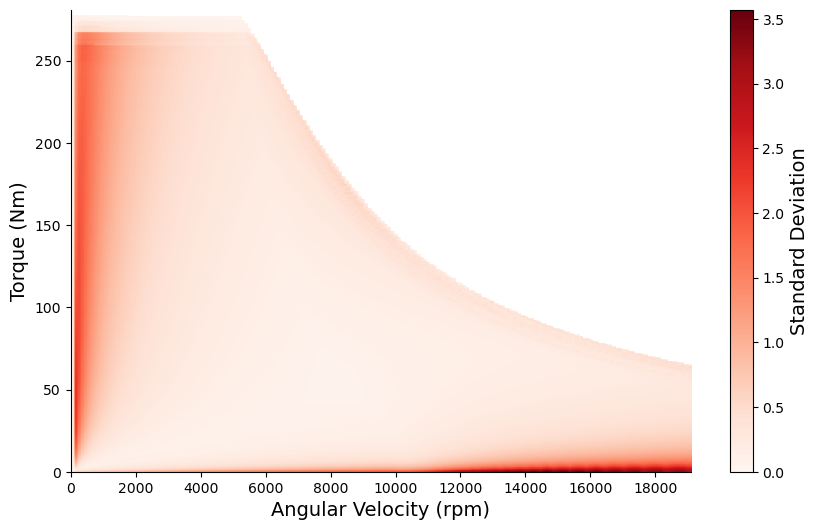

In [12]:
from src.inference import plot_kpi3d_stddev
y2_grid_test_avg = np.nanmean(y2_test_grid, axis=0)
plot_kpi3d_stddev(y2_grid_test_avg, y2_test_grid, plot = 'Standard Deviation', model='Target')

## Training

In [3]:
# !python main_train.py --max_torque 283 --min_torque 55 ##For client to override in case of new files to train on
!python main_train.py

wandb: Currently logged in as: lilly-abraham (lilly-abraham-technische-hochschule-w-rzburg-schweinfurt). Use `wandb login --relogin` to force relogin
wandb: wandb version 0.18.7 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade
wandb: Tracking run with wandb version 0.17.3
wandb: Run data is saved locally in /home/k64889/Masters-Thesis/wandb/run-20241127_034819-y4mvbd2h
wandb: Run `wandb offline` to turn off syncing.
wandb: Syncing run Fold 1
wandb: ⭐️ View project at https://wandb.ai/lilly-abraham-technische-hochschule-w-rzburg-schweinfurt/EM
wandb: 🚀 View run at https://wandb.ai/lilly-abraham-technische-hochschule-w-rzburg-schweinfurt/EM/runs/y4mvbd2h
Fold : 1 Best y1 score: 7.944592475891113 Best y2 score: 19.127161233466968
wandb:                                                                                
wandb: 
wandb: Run history:
wandb:          epoch ▁▂▃▃▄▅▆▆▇█
wandb:     train_loss █▃▂▁▁▁▁▁▁▁
wandb:  train_loss_y1 █▃▁▁▁▁▁▁▁▁
wandb:  train_loss_y2

In [ ]:
# When running with Colab
# instead of reading wandb api key from .env.local set it directly in script when running in colab as colab doesn't recognize .files..

# !conda run -n thesis python main_train.py

# !pip install -r requirements.txt
# !source thesis/bin/activate && python main_train.py
# !source thesis/bin/activate && python main_train.py --max_torque 283 --min_torque 55 ##For client to override in case of new files to train on

### Inference

In [1]:
import joblib
import os

x_mean = joblib.load('./Intermediate/x_mean.pkl')
x_stddev = joblib.load('./Intermediate/x_stddev.pkl')
max_mgrenz = joblib.load('./Intermediate/max_mgrenz.pkl')
model_path='./Intermediate/model.pth'

In [2]:
import torch
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = torch.load(model_path)

/home/k64889/miniconda3/envs/thesis/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
model

mlp_kpi3d(
  (shared_layers): Sequential(
    (0): Linear(in_features=89, out_features=128, bias=True)
    (1): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): Dropout(p=0.35, inplace=False)
    (4): Linear(in_features=128, out_features=128, bias=True)
    (5): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): ReLU()
    (7): Dropout(p=0.35, inplace=False)
  )
  (y1_layers): Sequential(
    (0): Linear(in_features=128, out_features=191, bias=True)
    (1): ReLU()
  )
  (y2_layers): Sequential(
    (0): Linear(in_features=128, out_features=1024, bias=True)
    (1): BatchNorm1d(1024, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): Dropout(p=0.2, inplace=False)
    (4): Linear(in_features=1024, out_features=2048, bias=True)
    (5): BatchNorm1d(2048, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): ReLU()
    (7): Dropout(p=0.2,

In [16]:
a

NameError: name 'a' is not defined

### New files + Useful for Compute Time Check

In [18]:
from src.table_creation import create_tabular_data
import pandas as pd
import os
from tqdm import tqdm

directory = os.path.join(os.getcwd(), 'data/Testing/raw')

df_test_inputs=pd.DataFrame()
df_test_y1_targets=pd.DataFrame()

for filename in tqdm(os.listdir(directory)):
    file_path = os.path.join(directory, filename)
    result = create_tabular_data(file_path, purpose='test')
    if result is not None:
        df_partial_inputs, df_partial_targets = result
        if df_partial_inputs is not None:
            df_test_inputs = pd.concat([df_test_inputs, df_partial_inputs])
            
        if df_partial_targets is not None:
            df_test_y1_targets = pd.concat([df_test_y1_targets, df_partial_targets])
        

100%|██████████| 2/2 [00:17<00:00,  8.96s/it]

Skipping .gitkeep file.


Predictions y1 shape: (1, 191)
Predictions y2 shape: (1, 281, 191)


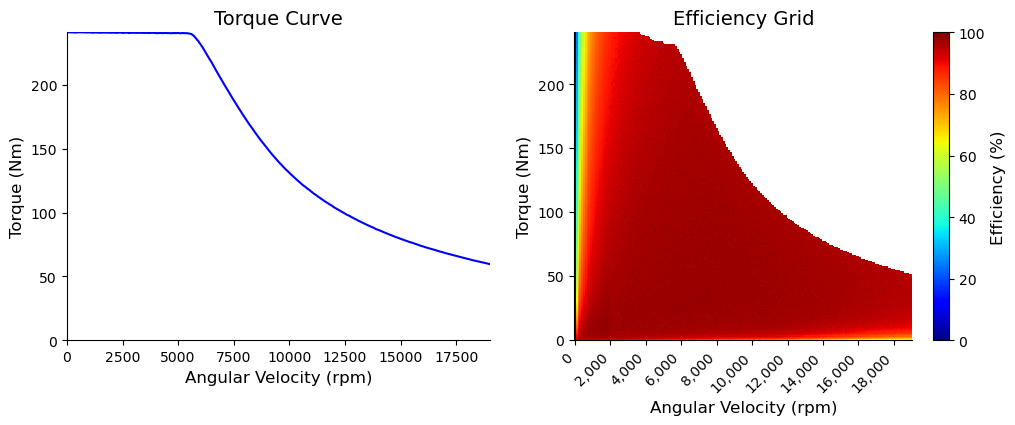

In [19]:
import joblib
import os
import torch
from src.inference import generate_predictions
from src.inference import kpi_plotting
import numpy as np

x_mean = joblib.load('./Intermediate/x_mean.pkl')
x_stddev = joblib.load('./Intermediate/x_stddev.pkl')
max_mgrenz = joblib.load('./Intermediate/max_mgrenz.pkl')
model_path='./Intermediate/model.pth'
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = torch.load(model_path)
df_predictions_y1, mm, eta_matrix = generate_predictions(model, df_test_inputs, df_test_y1_targets, x_mean, x_stddev, device)

index=0

nn_kpi_2d = list(range(0, 19100, 100))
nnkpi2darray = np.array(nn_kpi_2d)

eta_predicted = eta_matrix[index]
mm_predicted = np.array(mm[index])

kpi_plotting(index, nn_kpi_2d, df_predictions_y1, mm_predicted, eta_predicted)

In [12]:
a

NameError: name 'a' is not defined

### Dedicated Test Dataset

In [ ]:
import pandas as pd
df_test_inputs = pd.read_pickle('./data/df_test_inputs.pkl')
df_test_y1_targets = pd.read_pickle('./data/df_test_y1_targets.pkl')

### Cross Fold Models Stability Test

In [ ]:
from src.inference import generate_predictions
import numpy as np
mm_folds = []
eta_folds = []
y1_cross_fold = pd.DataFrame()
for fold in range(1,6):
    model_path=f'./Intermediate/model_fold{fold}.pth'
    model = torch.load(model_path)
    df_predictions_y1, mm, eta_matrix = generate_predictions(model, df_test_inputs.iloc[:1], df_test_y1_targets.iloc[:1], x_mean, x_stddev, device)
    y1_cross_fold=pd.concat([y1_cross_fold, df_predictions_y1], ignore_index=True)
    mm_folds.append(mm[0])#Extract only the element in the list, anyways there will be only 1 element in list so
    eta_folds.append(eta_matrix[0])


Predictions y1 shape: (1, 191)
Predictions y2 shape: (1, 281, 191)
Predictions y1 shape: (1, 191)
Predictions y2 shape: (1, 281, 191)
Predictions y1 shape: (1, 191)
Predictions y2 shape: (1, 281, 191)
Predictions y1 shape: (1, 191)
Predictions y2 shape: (1, 281, 191)
Predictions y1 shape: (1, 191)
Predictions y2 shape: (1, 281, 191)


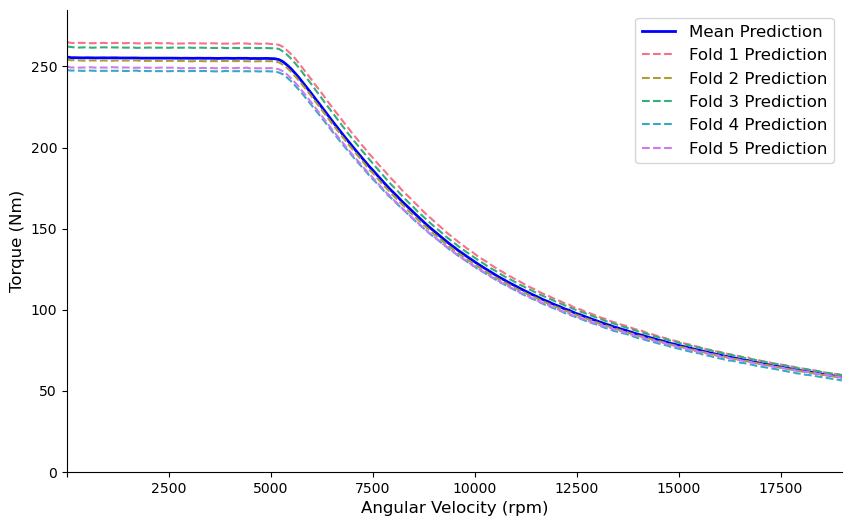

In [ ]:
from src.inference import y1_folds_deviations
y1_folds_deviations(y1_cross_fold)

In [ ]:
speed_ranges = [20, 40, 60, 80, 100, 120, 140, 160, 180]
predicted_eta_folds = []

# Populate `predicted_eta_folds` for each speed
for speed in speed_ranges:
    predicted_eta_speed_folds = [matrix[:, speed] for matrix in eta_folds[:]]
    predicted_eta_folds.append(predicted_eta_speed_folds)

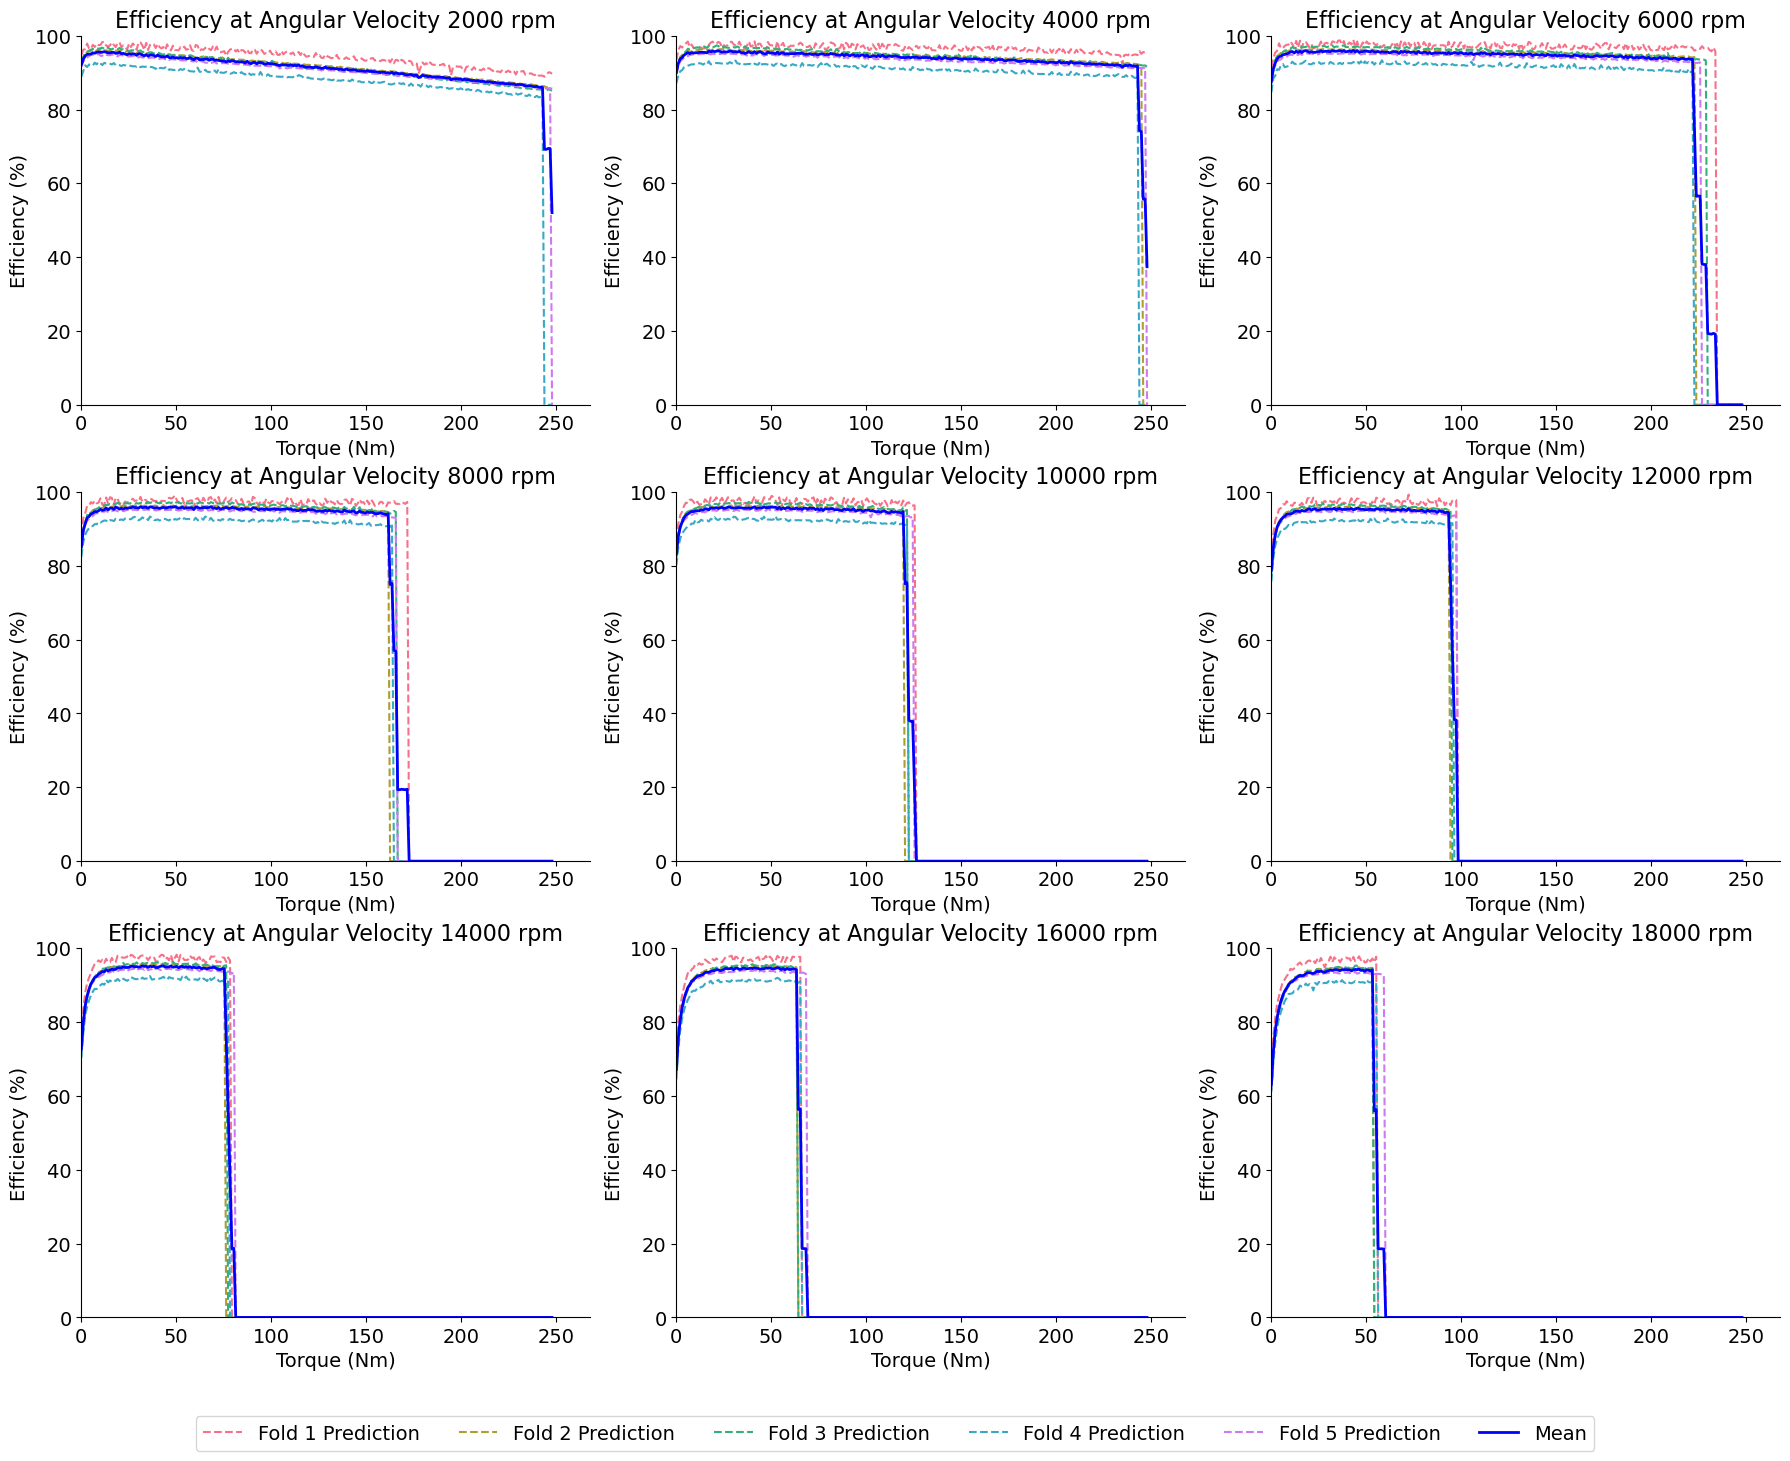

In [ ]:
from src.inference import y2_folds_deviations
y2_folds_deviations(predicted_eta_folds, speed_ranges)

## MLP Prediction Y1

In [ ]:
from src.inference import generate_predictions
df_predictions_y1, mm, eta_matrix = generate_predictions(model, df_test_inputs, df_test_y1_targets, x_mean, x_stddev, device)

Predictions y1 shape: (50, 191)
Predictions y2 shape: (50, 281, 191)


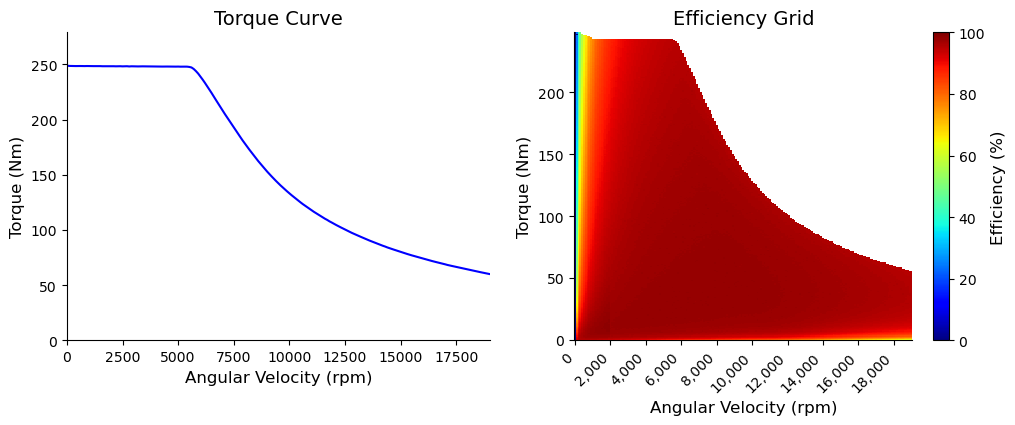

In [ ]:
from src.inference import kpi_plotting
import numpy as np
index=5

nn_kpi_2d = list(range(0, 19100, 100))
nnkpi2darray = np.array(nn_kpi_2d)

eta_predicted = eta_matrix[index]
mm_predicted = np.array(mm[index])

kpi_plotting(index, nn_kpi_2d, df_predictions_y1, mm_predicted, eta_predicted)

### Comparision Plots for Prediction Y1

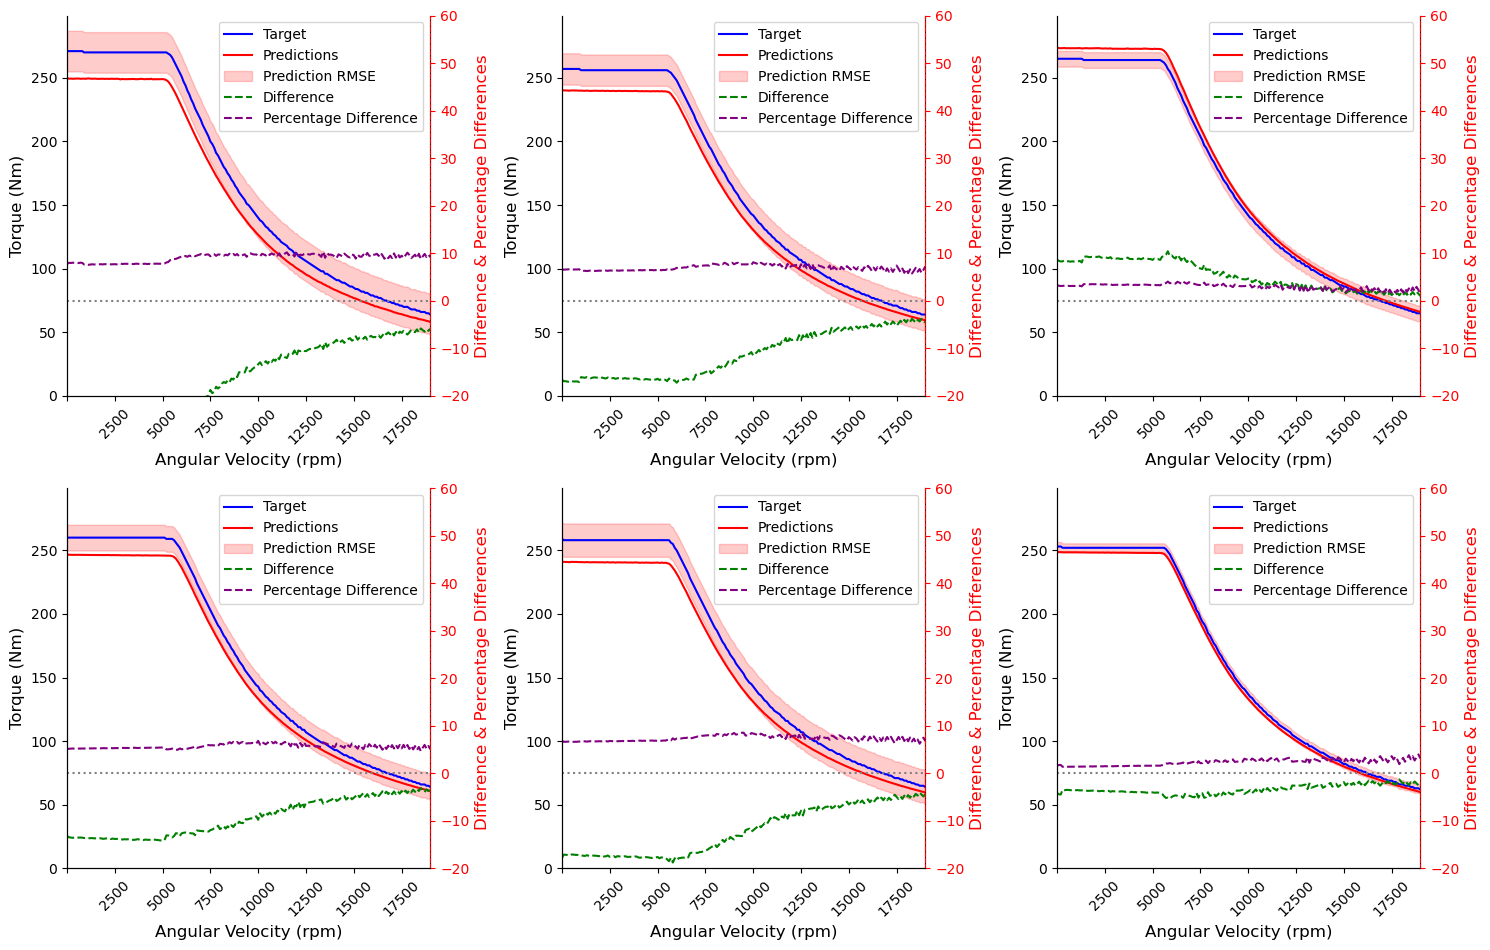

In [ ]:
from src.inference import eval_plot_kpi2d
eval_plot_kpi2d(df_test_y1_targets, df_predictions_y1,start=0, end=5, cols=3)

In [ ]:
from src.inference import y1_score
y1_avg_mlp_score, y1_mlp_scores=y1_score(df_predictions_y1, df_test_y1_targets, 'MLP')
print(f"Average Y1 MLP Score: {y1_avg_mlp_score:.4f}")

Average Y1 MLP Score: 8.2629


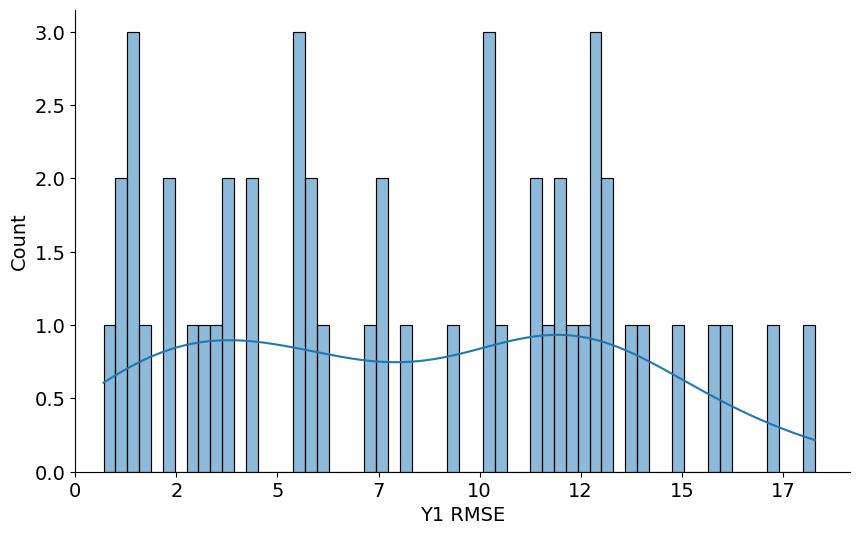

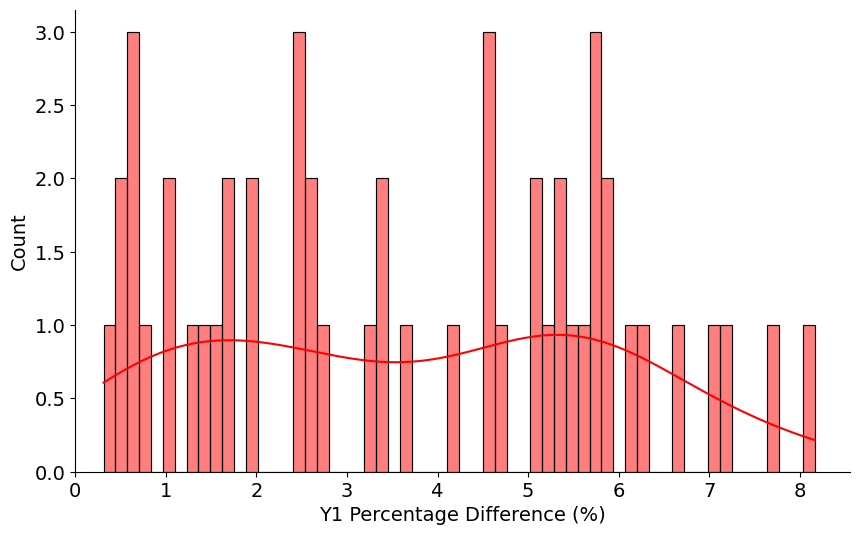

In [ ]:
from src.inference import plot_scores
plot_scores(y1_mlp_scores, 'Y1', 'MLP')

### RMSE of the Test Values with that of the MLP Predictions Average value

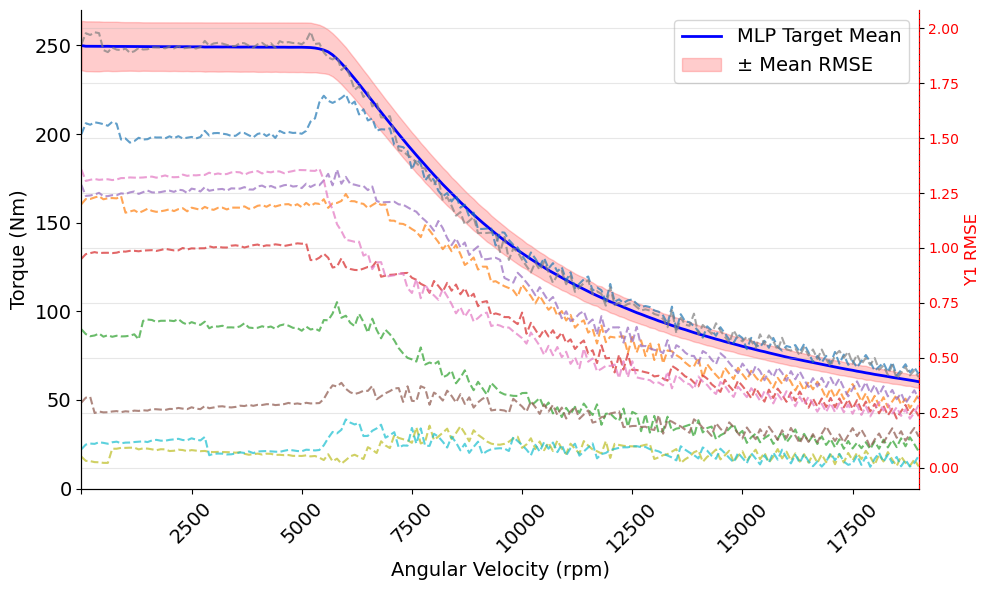

In [ ]:
from src.inference import plot_mgrenz_statistics
plot_mgrenz_statistics(df_predictions_y1.iloc[:10], df_test_y1_targets.iloc[:10], plot = 'RMSE', model= 'MLP')

## MLP Prediction Y2

### Comparision Plots for Prediction Y2

Sample 0:
Original ETA shape: (272, 191)
Predicted ETA shape: (250, 191)
Original MM shape: (272,)
Predicted MM shape: (250,)


<Figure size 2400x2000 with 0 Axes>

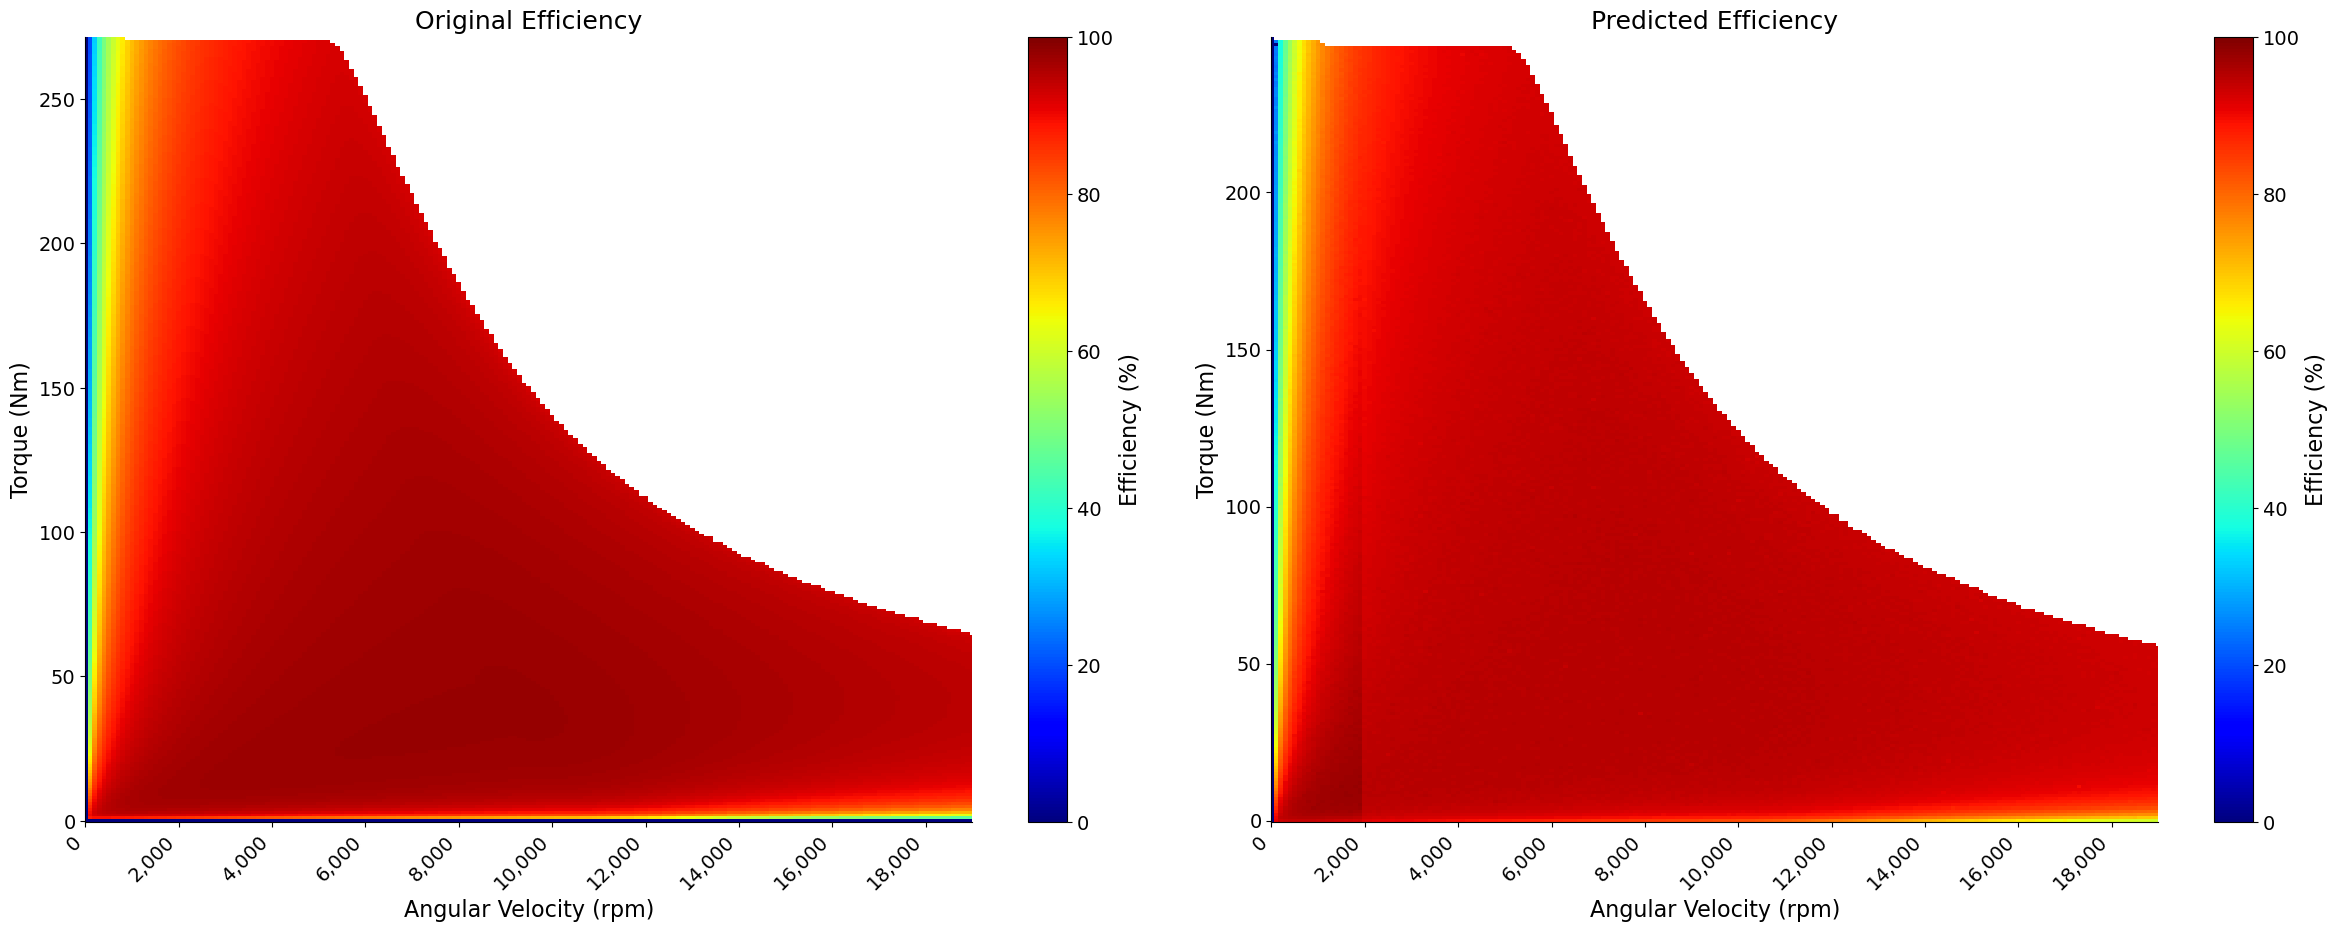

Sample 1:
Original ETA shape: (258, 191)
Predicted ETA shape: (240, 191)
Original MM shape: (258,)
Predicted MM shape: (240,)


<Figure size 2400x2000 with 0 Axes>

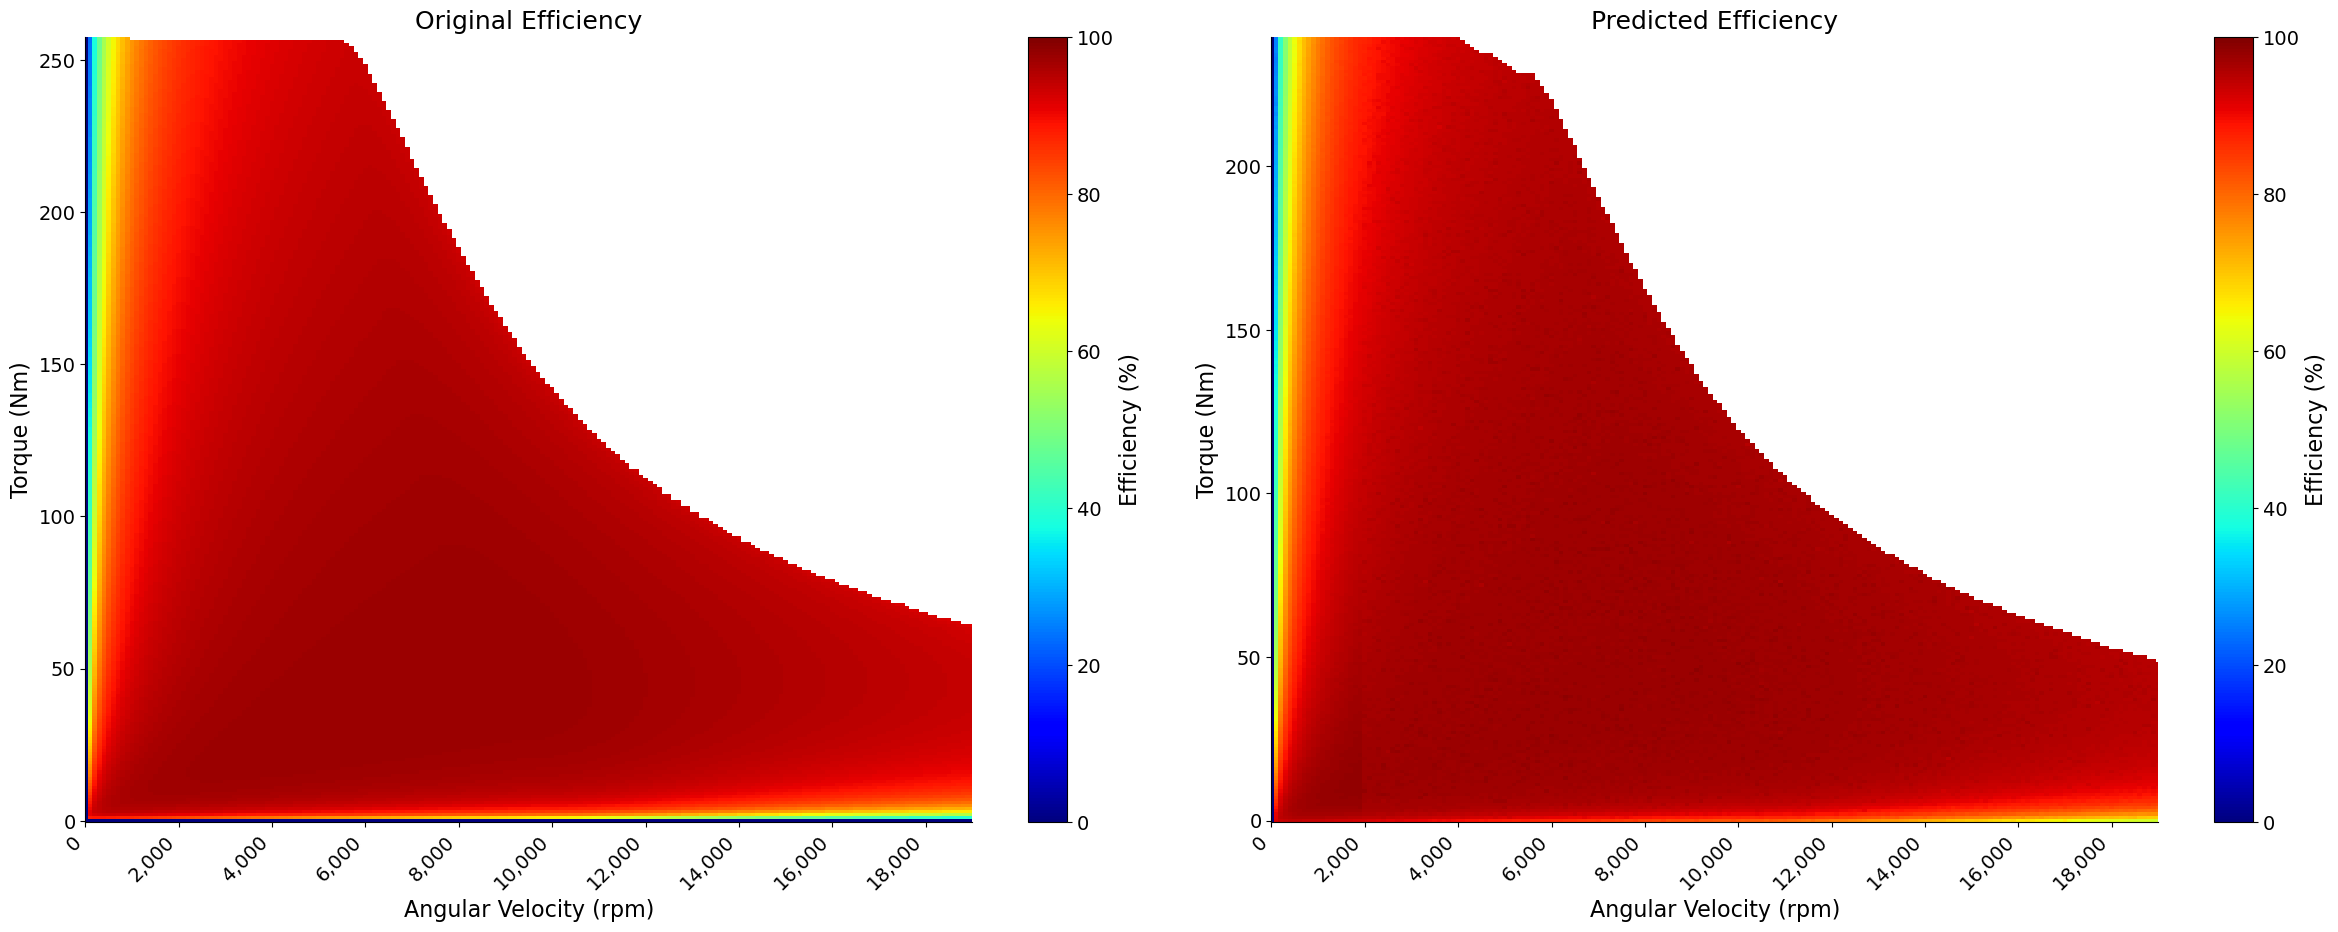

Sample 2:
Original ETA shape: (266, 191)
Predicted ETA shape: (274, 191)
Original MM shape: (266,)
Predicted MM shape: (274,)


<Figure size 2400x2000 with 0 Axes>

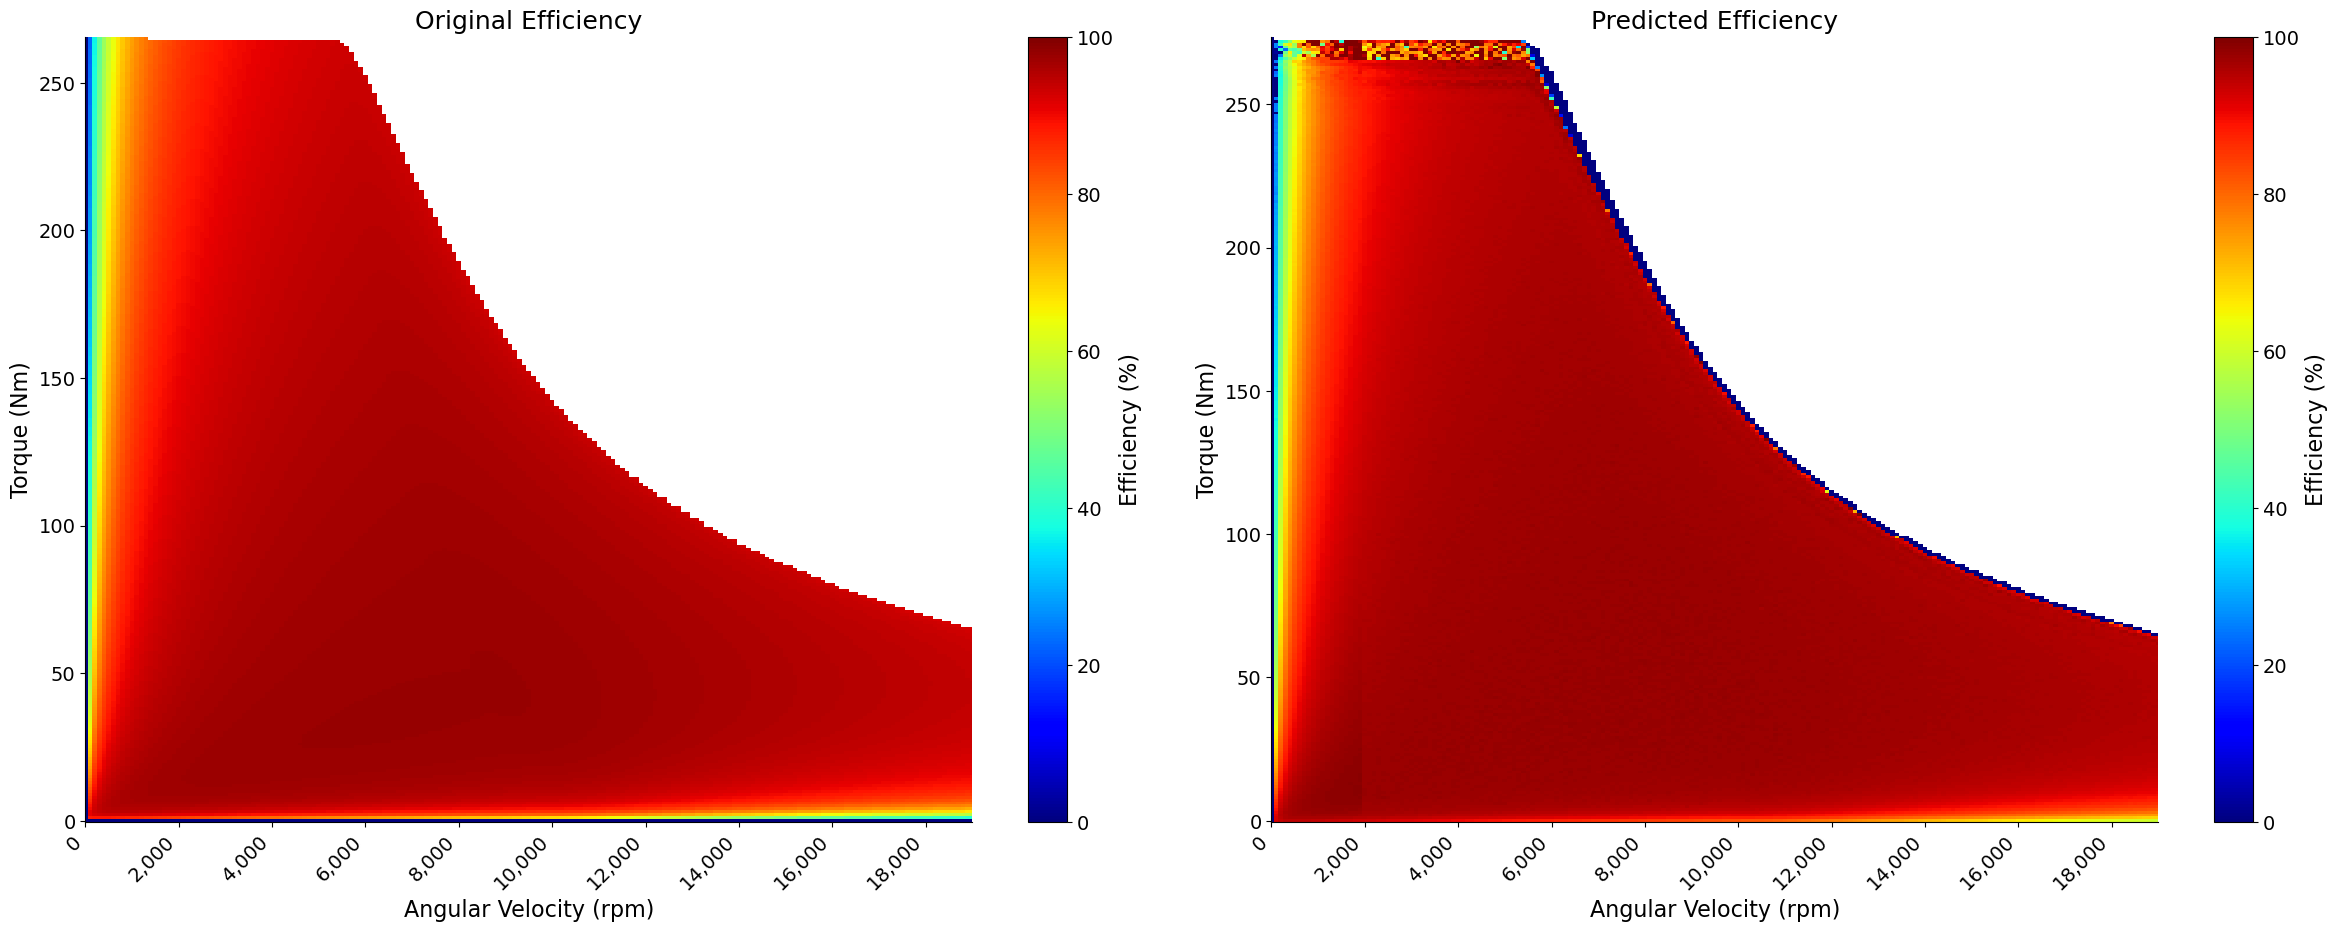

In [ ]:
from src.utils import read_file_1d, read_file_2d
from src.inference import plot_kpi3d_dual
import numpy as np
import matplotlib.pyplot as plt

nn_kpi_2d = list(range(0, 19100, 100))
nnkpi2darray = np.array(nn_kpi_2d)

start_index=0
max_index = 3

for index_no in range(start_index, max_index):
    
    filename_test = df_test_inputs.index[index_no]
    #file_path = f'./data/{filename_test}.xlsx'
    file_path = f'./data/raw/{filename_test}.xlsx'

    # Read Original MM and ETA data from the Excel file
    eta_kpi3d = read_file_2d(file_path, 'ETA')
    mm_input = read_file_1d(file_path, 'MM')
    mm_kpi3d  = np.array(mm_input[-eta_kpi3d.shape[0]:])
    
    eta_predicted = eta_matrix[index_no]
    mm_predicted = np.array(mm[index_no])
    
    print(f"Sample {index_no}:")
    print(f"Original ETA shape: {eta_kpi3d.shape}")
    print(f"Predicted ETA shape: {eta_predicted.shape}")
    print(f"Original MM shape: {mm_kpi3d.shape}")
    print(f"Predicted MM shape: {mm_predicted.shape}")
    
    #Instead of creating a new figure for each plot, add to a grid
    plt.figure(figsize=(24, 20))  # Adjust figure size for all subplots

    # Plot the dual KPI 3D graph
    plot_kpi3d_dual(nnkpi2darray, mm_kpi3d, eta_kpi3d, mm_predicted, eta_predicted, filename_test)
    
    save_path = os.path.join('./Manuscript/ReportImages/', f'kpi3dprediction{index_no}.png')  # Adjust the path as needed
    plt.savefig(save_path, bbox_inches='tight')
    plt.show()

plt.show()

Sample 0:
Original ETA shape: (272, 191)
Predicted ETA shape: (250, 191)
Original MM shape: (272,)
Predicted MM shape: (250,)
Filename: 738562.5614_PM180_HPIN_4layer_p4q2_doubleV_pitched_HMC_020_000013


<Figure size 2400x2000 with 0 Axes>

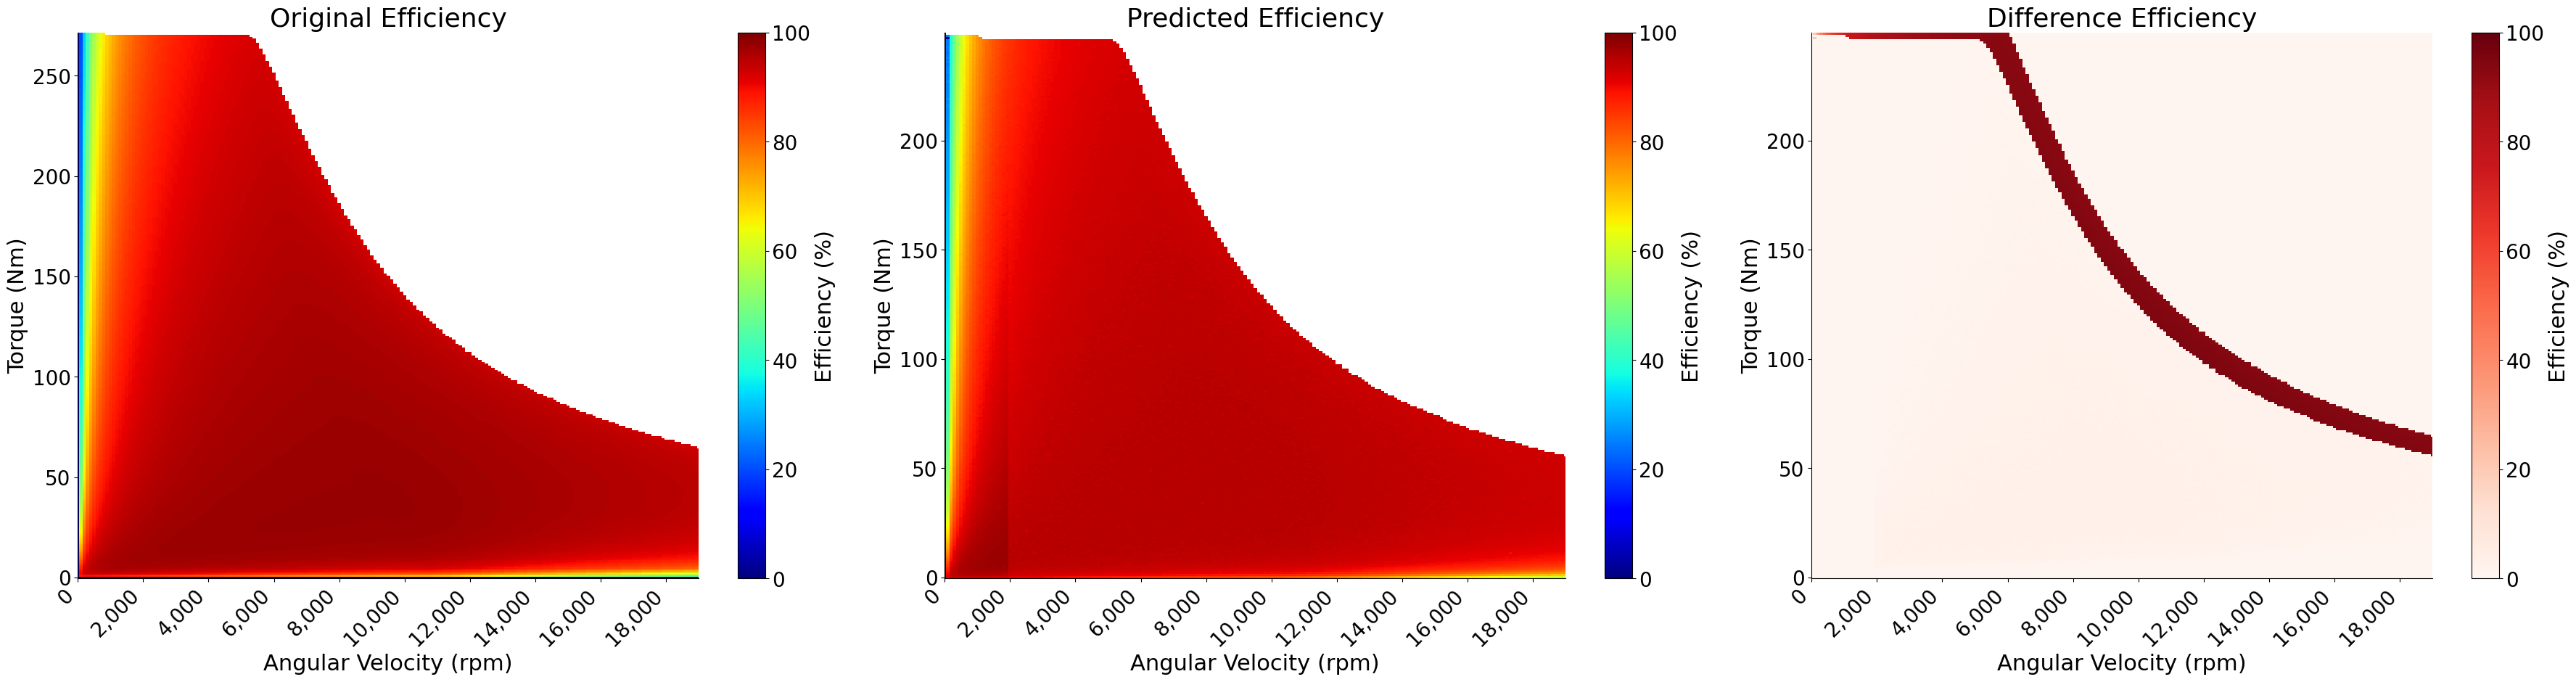

Sample 1:
Original ETA shape: (258, 191)
Predicted ETA shape: (240, 191)
Original MM shape: (258,)
Predicted MM shape: (240,)
Filename: 738561.6696_PM180_HPIN_4layer_p4q2_doubleV_pitched_047_000002


<Figure size 2400x2000 with 0 Axes>

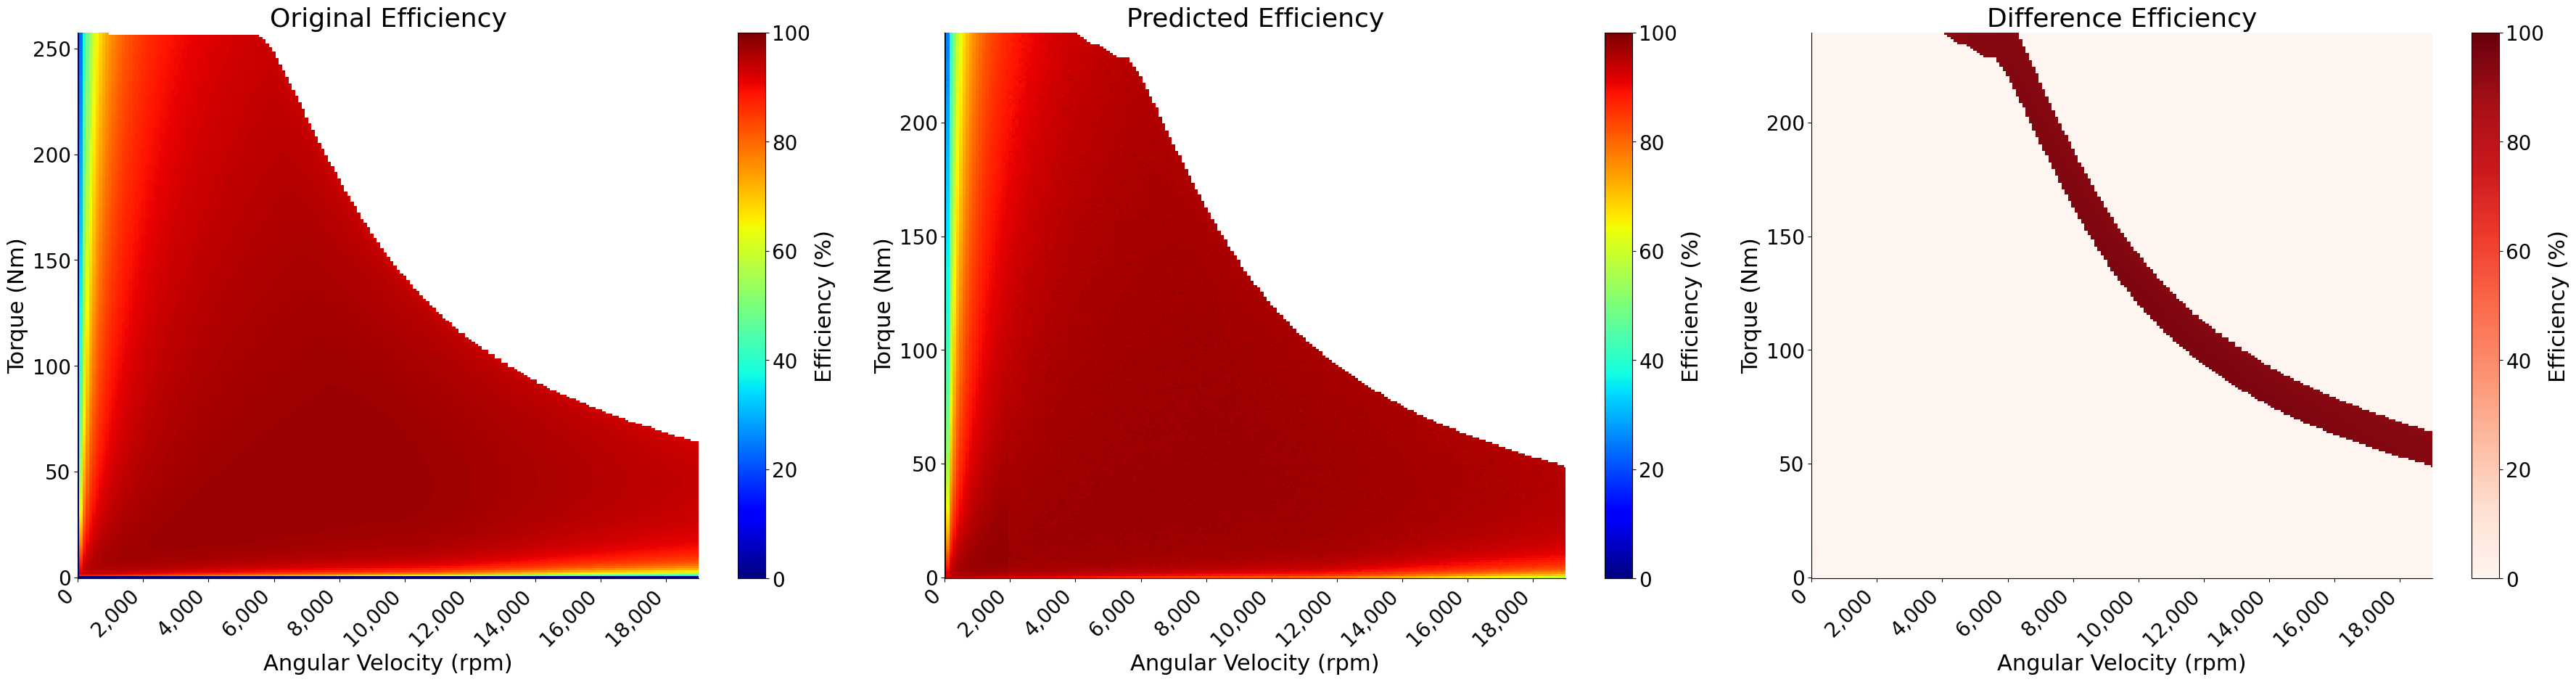

Sample 2:
Original ETA shape: (266, 191)
Predicted ETA shape: (274, 191)
Original MM shape: (266,)
Predicted MM shape: (274,)
Filename: 738561.65_PM180_HPIN_4layer_p4q2_doubleV_pitched_029_000004


<Figure size 2400x2000 with 0 Axes>

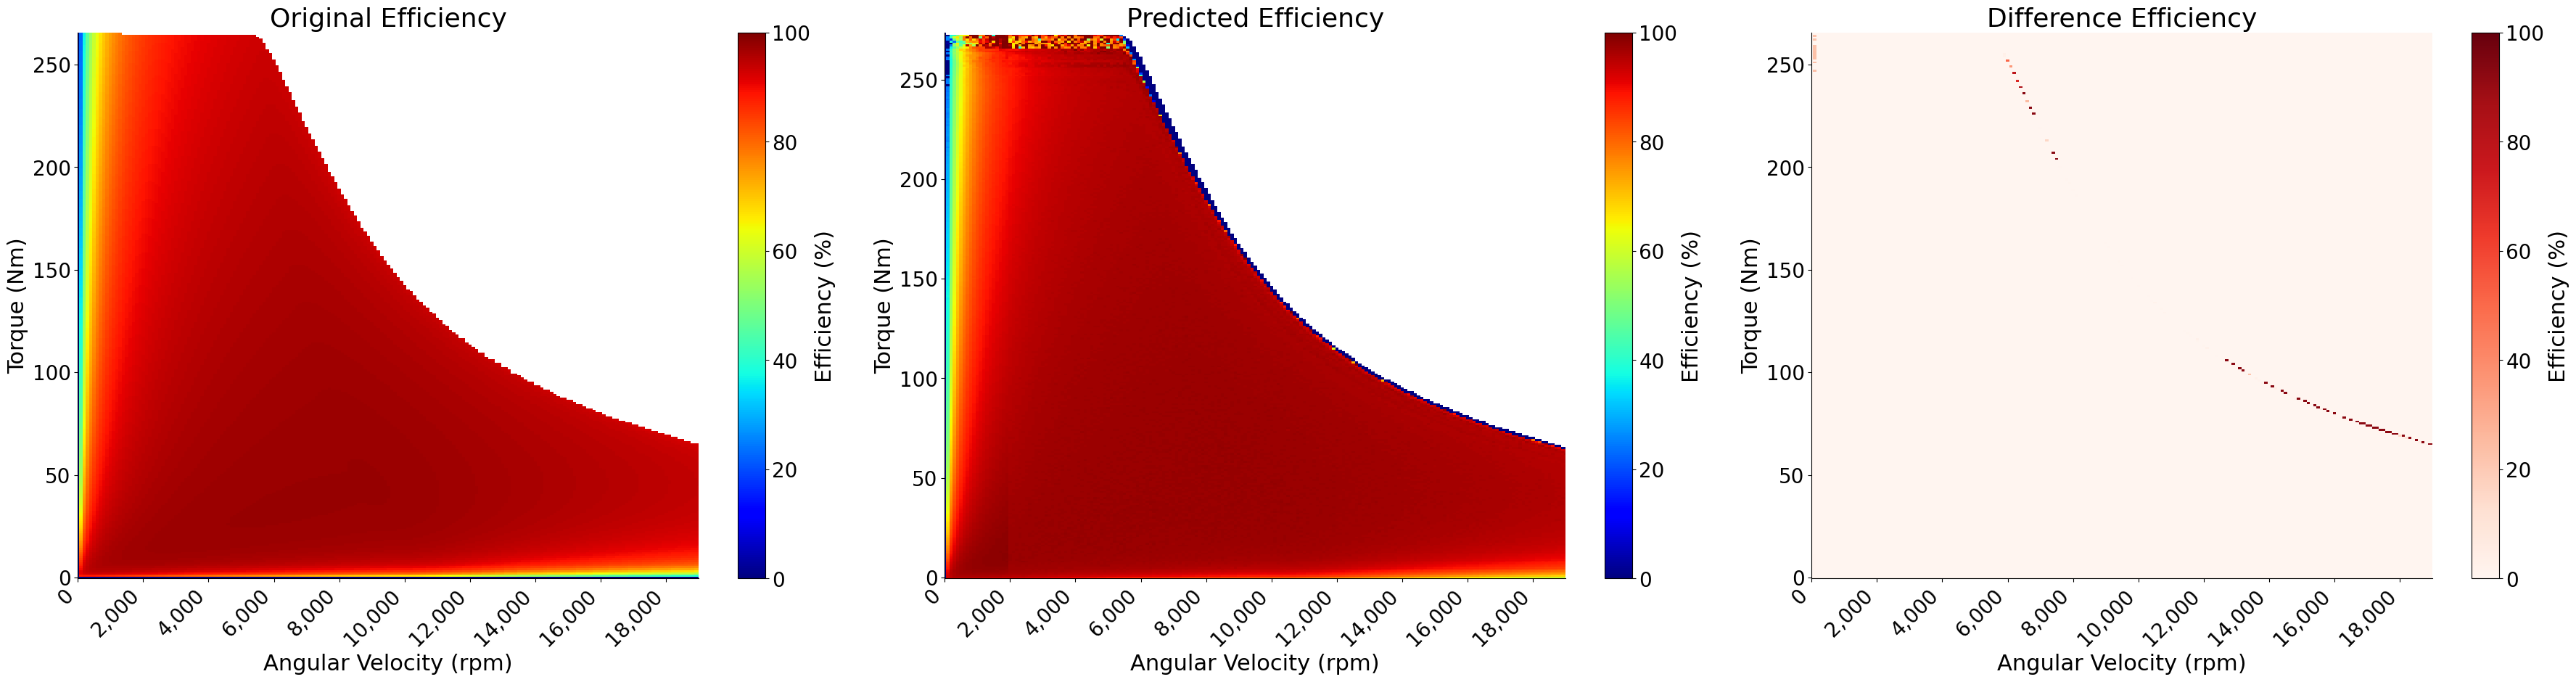

In [ ]:
from src.utils import read_file_1d, read_file_2d
import numpy as np
import matplotlib.pyplot as plt
from src.inference import eval_plot_kpi3d, eta_difference

nn_kpi_2d = list(range(0, 19100, 100))
nnkpi2darray = np.array(nn_kpi_2d)

start_index=0
max_index = 3

for index_no in range(start_index, max_index):
    
    filename_test = df_test_inputs.index[index_no]
    file_path = f'./data/raw/{filename_test}.xlsx'
    # file_path = f'./data/{filename_test}.xlsx'

    # Read Original MM and ETA data from the Excel file
    eta_kpi3d = read_file_2d(file_path, 'ETA')
    mm_input = read_file_1d(file_path, 'MM')
    mm_kpi3d  = np.array(mm_input[-eta_kpi3d.shape[0]:])
    
    eta_predicted = eta_matrix[index_no]
    mm_predicted = np.array(mm[index_no])
    
    print(f"Sample {index_no}:")
    print(f"Original ETA shape: {eta_kpi3d.shape}")
    print(f"Predicted ETA shape: {eta_predicted.shape}")
    print(f"Original MM shape: {mm_kpi3d.shape}")
    print(f"Predicted MM shape: {mm_predicted.shape}")
    print(f"Filename: {filename_test}")
    
    #Instead of creating a new figure for each plot, add to a grid
    plt.figure(figsize=(24, 20))  # Adjust figure size for all subplots
    
    mm_diff = mm_kpi3d if len(mm_kpi3d) <= len(mm_predicted) else mm_predicted

    eta_diff = eta_difference(eta_kpi3d, eta_predicted)

    # Plot the dual KPI 3D graph
    eval_plot_kpi3d(nnkpi2darray, mm_kpi3d, eta_kpi3d, mm_predicted, eta_predicted, mm_diff, eta_diff, filename_test)
    
    save_path = os.path.join('./Manuscript/ReportImages/', f'evalkpi3dprediction{index_no}.png')  # Adjust the path as needed
    plt.savefig(save_path, bbox_inches='tight')
    plt.show()

plt.show()

In [ ]:
from src.utils import read_file_2d
from src.inference import eta_difference, y2_score
import numpy as np

nn_kpi_2d = list(range(0, 19100, 100))
nnkpi2darray = np.array(nn_kpi_2d)

score=0
start_index=0
max_index = 49
y2_mlp_scores=[]


for index_no in range(start_index,max_index):
    
    filename_test = df_test_inputs.index[index_no]
    file_path = f'./data/raw/{filename_test}.xlsx'

    eta_kpi3d = read_file_2d(file_path, 'ETA')
    
    eta_predicted = eta_matrix[index_no]

    eta_diff = eta_difference(eta_kpi3d, eta_predicted)
    rmse = y2_score(eta_diff)
    y2_mlp_scores.append(rmse)
    score+=rmse
    
y2_mlp_avg_score = score/(max_index-start_index)
print(f"Average Y2 MLP Score: {y2_mlp_avg_score:.4f}")

Average Y2 MLP Score: 15.6070


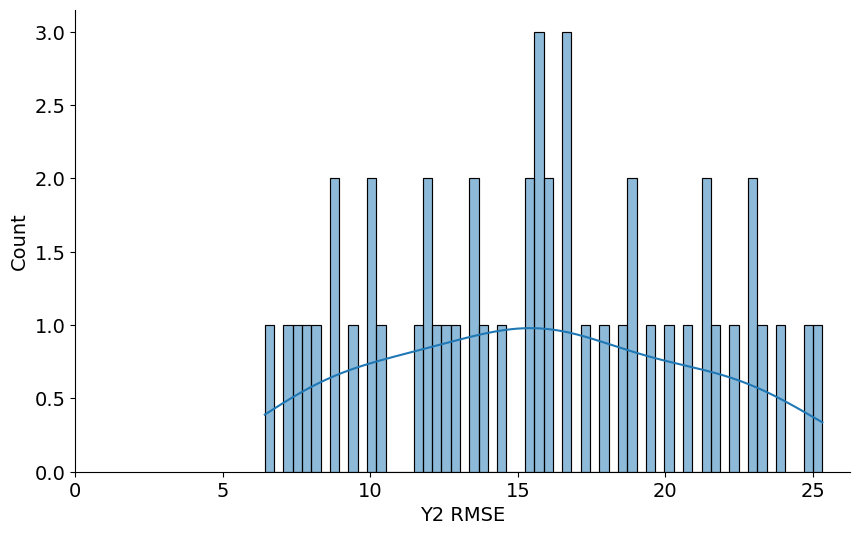

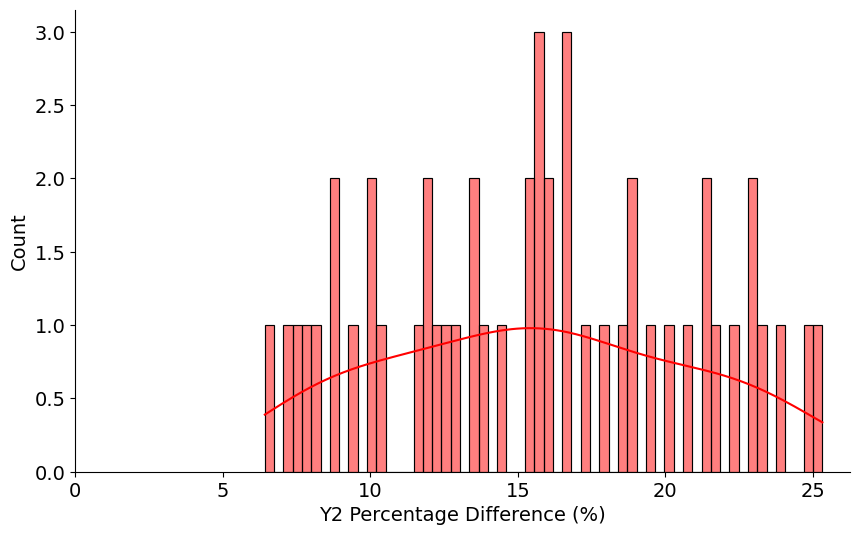

In [ ]:
from src.inference import plot_scores
plot_scores(y2_mlp_scores, 'Y2' , 'MLP')

### Eval Statistics across NN ranges all Samples

In [ ]:
import numpy as np

y2_grid = np.load('./data/TabularDataETA.npy')
y2_test_grid = y2_grid[-50:, :, :] # Test set

speed_ranges = [20, 40, 60, 80, 100, 120, 140, 160, 180]

predicted_eta = []
target_eta = []
mean_eta = []
std_eta = []

for speed in speed_ranges:
    predicted_eta_speed = [matrix[:, speed] for matrix in eta_matrix]
    predicted_eta.append(predicted_eta_speed)

    target_eta_speed = [matrix[:, speed] for matrix in y2_test_grid]
    target_eta.append(target_eta_speed)
    
    eta_concatenated = np.concatenate(predicted_eta_speed)#Coz its list
    mean_eta.append(np.nanmean(eta_concatenated))
    std_eta.append(np.nanstd(eta_concatenated))

/home/k64889/Masters-Thesis/src/inference.py:473: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  plt.errorbar(speed_ranges, mean_eta, yerr=std_eta, fmt='o', capsize=5, label="Mean ± Standard Deviation", ecolor='red', linestyle='--', marker='s')


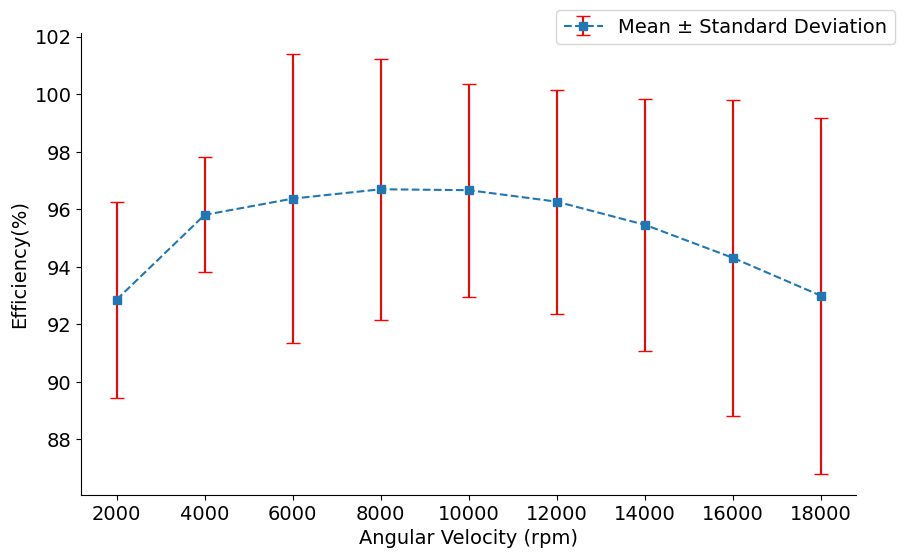

In [ ]:
from src.inference import plot_eta_mean_statistics as plot_eta_mean_statistics
plot_eta_mean_statistics(speed_ranges, mean_eta, std_eta, 'MLP')

### Eval Statistics across certain NN ranges few Samples

In [ ]:
predicted_eta = []
target_eta = []

for speed in speed_ranges:
    predicted_eta_speed = [matrix[:, speed] for matrix in eta_matrix[0:5]]
    predicted_eta.append(predicted_eta_speed)

    target_eta_speed = [matrix[:, speed] for matrix in y2_test_grid[0:5]]
    target_eta.append(target_eta_speed)

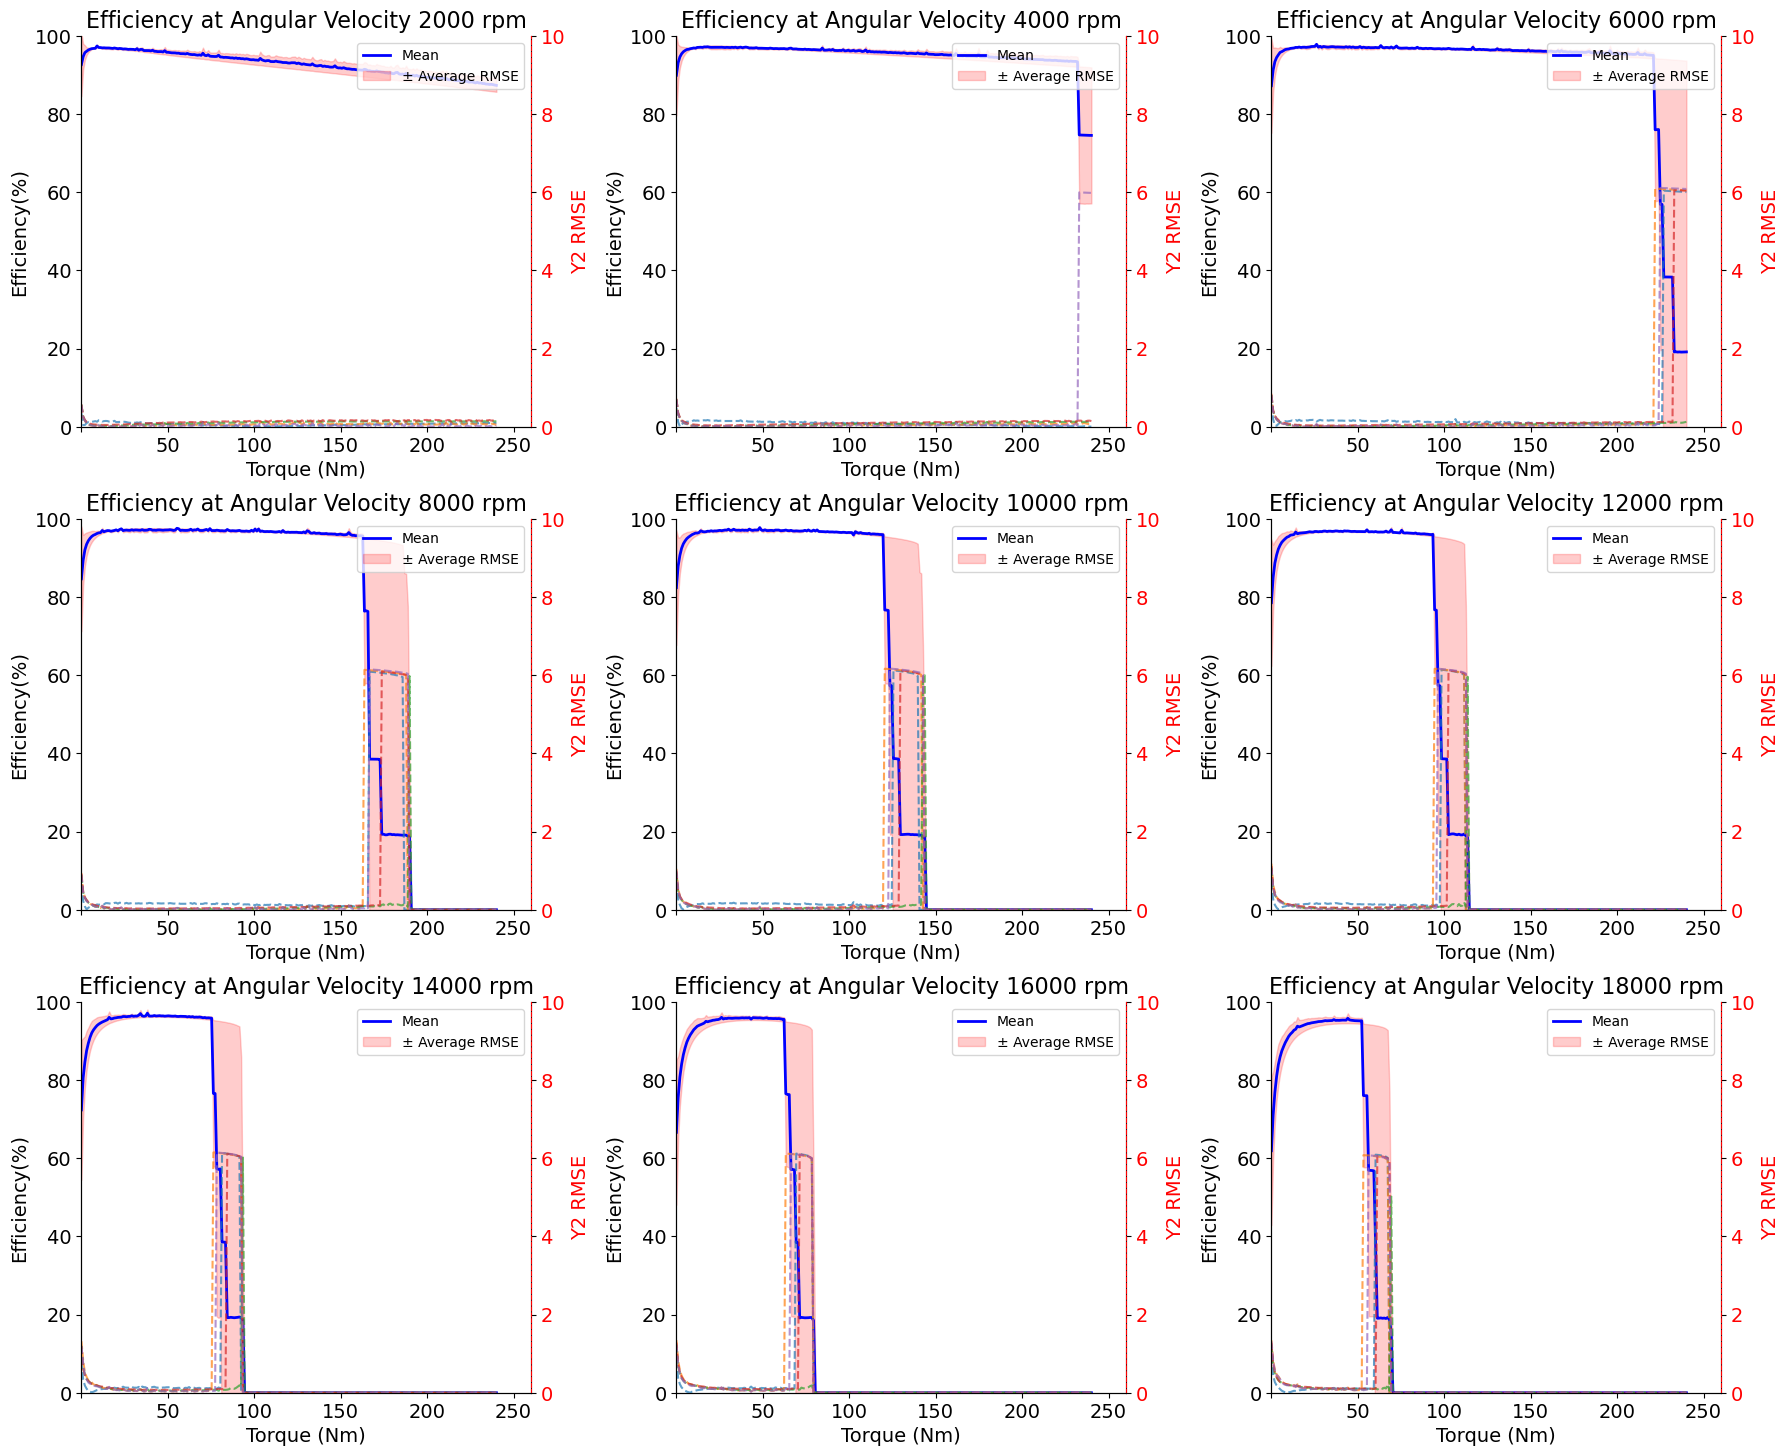

In [ ]:
from src.inference import plot_eta_statistics as plot_eta_statistics
plot_eta_statistics(predicted_eta, target_eta, speed_ranges, 'MLP')

## Ablation Studies

### Baseline Average Y1

In [ ]:
import pandas as pd

df_targets=pd.read_csv('./data/TabularDataY1Targets.csv')
df_train_targets = df_targets[:-50] 
# Average is train dataset
df_train_targets.rename(columns={'Unnamed: 0':'filename'}, inplace=True)
df_y1_baseline = df_train_targets.drop(columns=['filename']).mean()

df_y1_baseline = df_y1_baseline.to_frame(name='Average').transpose()
df_y1_baseline

/tmp/ipykernel_213206/4244406676.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train_targets.rename(columns={'Unnamed: 0':'filename'}, inplace=True)


Column_1    Column_2    Column_3    Column_4    Column_5  \
Average  257.241404  256.909474  256.898246  256.889123  256.877895   

           Column_6    Column_7  Column_8    Column_9   Column_10  ...  \
Average  256.864561  256.849825    256.84  256.821754  256.810526  ...   

         Column_182  Column_183  Column_184  Column_185  Column_186  \
Average   65.886316    65.41193   65.004211   64.557895   64.130526   

         Column_187  Column_188  Column_189  Column_190  Column_191  
Average   63.722105       63.28   62.905263   62.471579   62.089123  

[1 rows x 191 columns]

In [ ]:
from src.inference import y1_score
y1_avg_baseline_score, y1_baseline_scores = y1_score(df_y1_baseline, df_test_y1_targets, 'Baseline')
print(f"Average Y1 Baseline Score: {y1_avg_baseline_score:.4f}")

Average Y1 Baseline Score: 4.8201


Score calculation different for baseline as it is not based on index filename

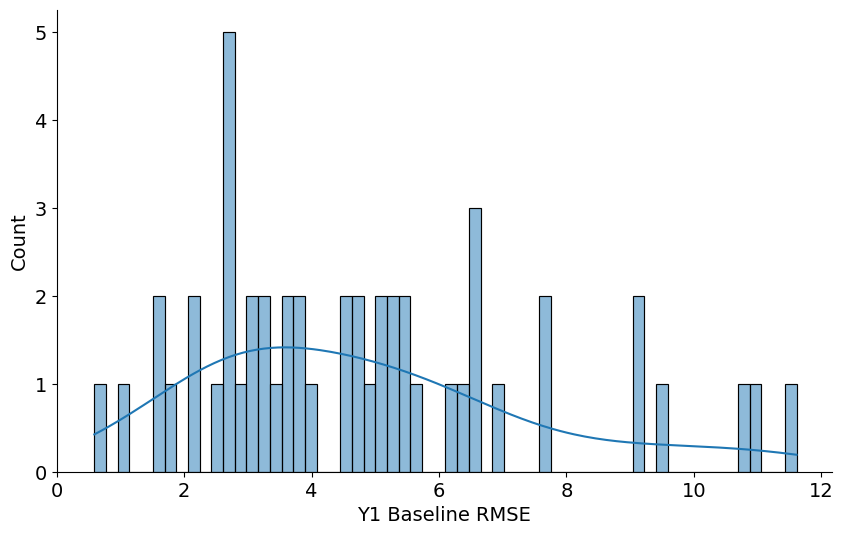

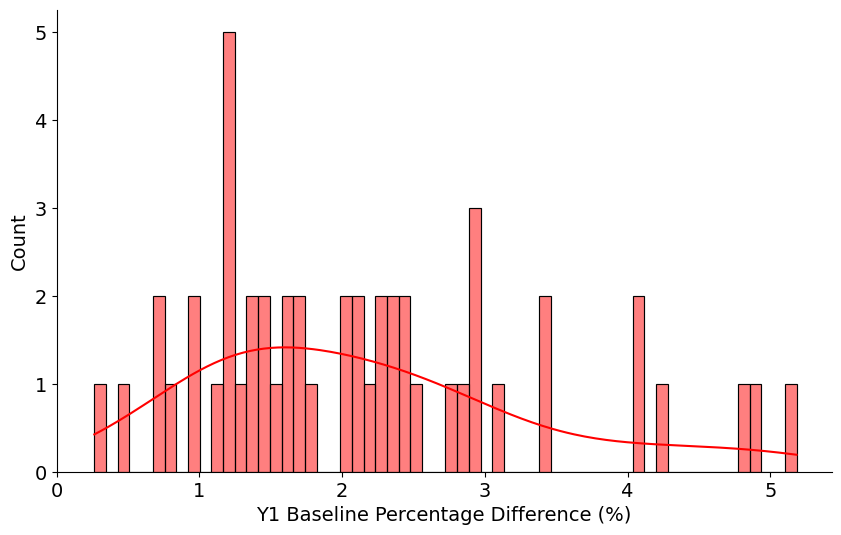

In [ ]:
from src.inference import plot_scores
plot_scores(y1_baseline_scores, 'Y1', 'Baseline')

### Plot standard deviation of the Test Values with that of the Baseline Average value

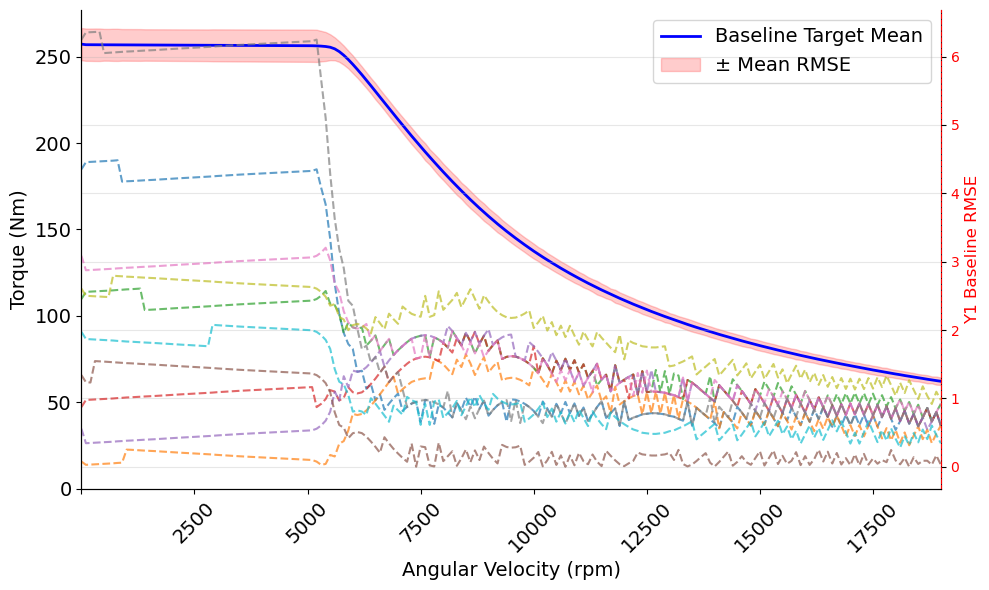

In [ ]:
from src.inference import plot_mgrenz_statistics
plot_mgrenz_statistics(df_y1_baseline.iloc[:10], df_test_y1_targets.iloc[:10], plot = 'RMSE', model= 'Baseline')

### Baseline Average Y2

In [ ]:
import numpy as np
y2_grid = np.load('./data/TabularDataETA.npy')
y2_grid_train = y2_grid[:-50, :, :] # Train set
y2_test_grid = y2_grid[-50:, :, :] # Test set

In [ ]:
y2_grid_baseline = np.nanmean(y2_grid_train, axis=0)

/tmp/ipykernel_213206/4225433658.py:1: RuntimeWarning: Mean of empty slice
  y2_grid_baseline = np.nanmean(y2_grid_train, axis=0)


In [ ]:
import numpy as np
from src.inference import eta_difference, y2_score

nn_kpi_2d = list(range(0, 19100, 100))
nnkpi2darray = np.array(nn_kpi_2d)

score=0
start_index=0
max_index = 49
y2_baseline_scores=[]

for index_no in range(start_index,max_index):
    ###########################TODO 
    eta_kpi3d = y2_test_grid[index_no]
    
    eta_predicted = y2_grid_baseline 
    
    eta_diff = eta_difference(eta_kpi3d, eta_predicted)
    rmse = y2_score(eta_diff)
    y2_baseline_scores.append(rmse)
    score+=rmse
    
y2_baseline_avg_score = score/(max_index-start_index)
print(f"Average Y2 Baseline Score: {y2_baseline_avg_score:.4f}")

Average Y2 Baseline Score: 15.3708


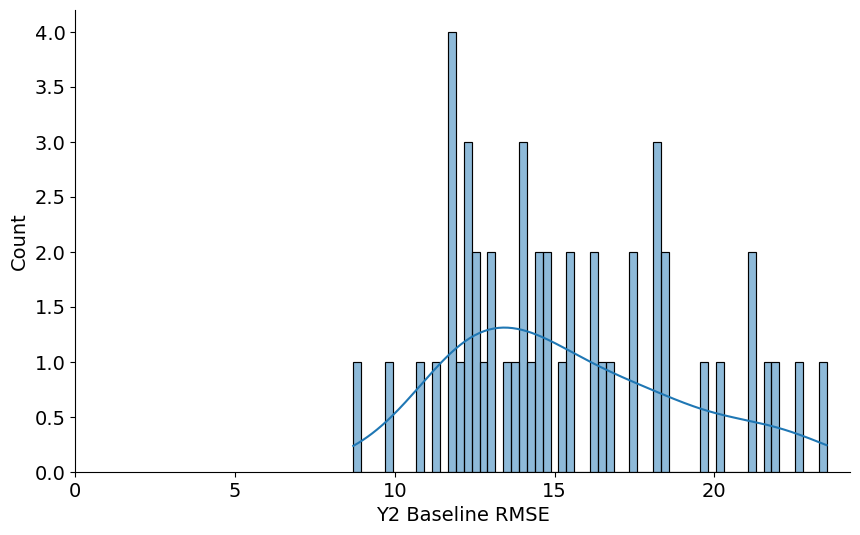

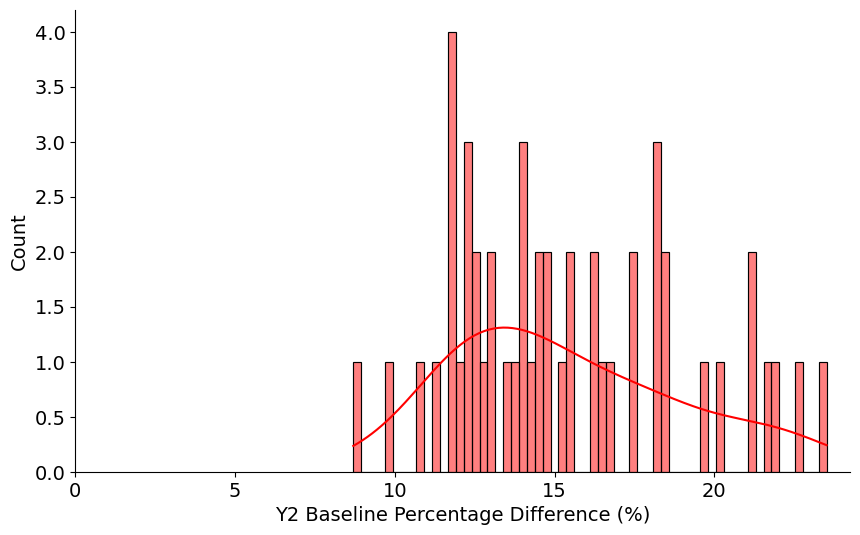

In [ ]:
from src.inference import plot_scores
plot_scores(y2_baseline_scores, 'Y2', 'Baseline')

In [ ]:
df_y1_avg_rounded = df_y1_baseline.round(0).astype(int)
max_value = df_y1_avg_rounded.max(axis=1).iloc[0]
mm_matrix=np.array(list(range(0, max_mgrenz + 1)))

Sample 0:
Original ETA shape: (272, 191)
Predicted ETA shape: (281, 191)
Original MM shape: (272,)
Predicted MM shape: (281,)
Sample 1:
Original ETA shape: (258, 191)
Predicted ETA shape: (281, 191)
Original MM shape: (258,)
Predicted MM shape: (281,)


<Figure size 2400x2000 with 0 Axes>

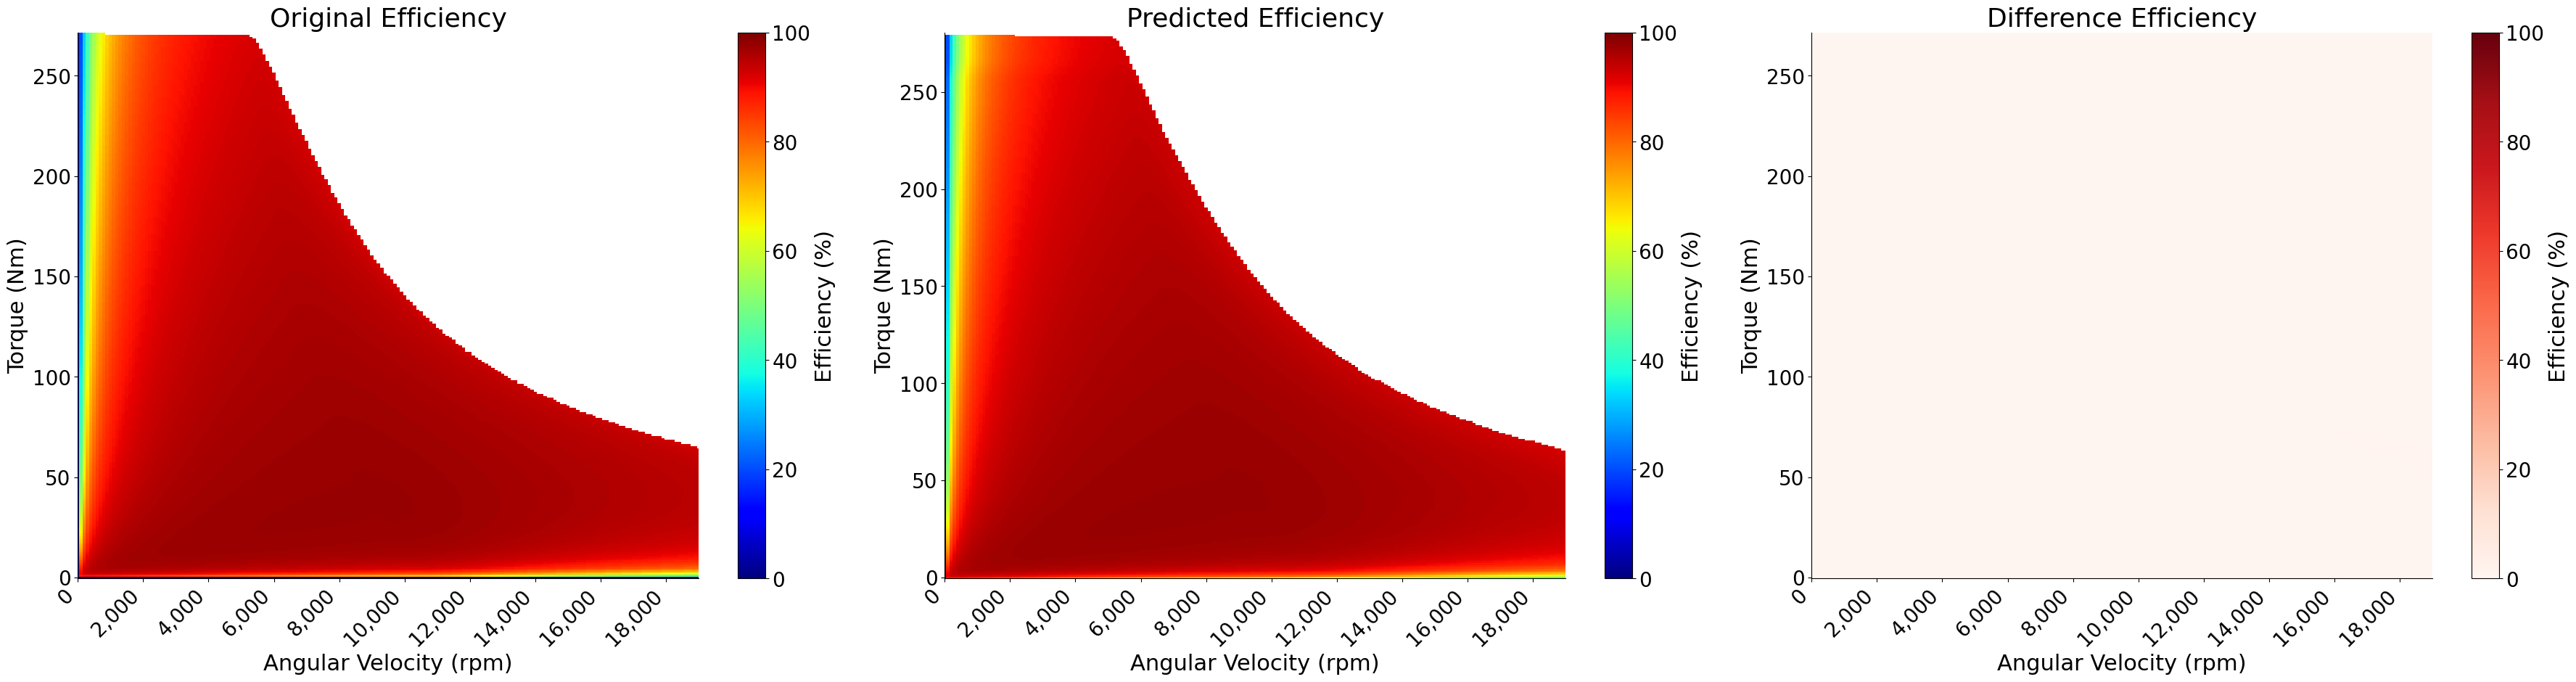

<Figure size 2400x2000 with 0 Axes>

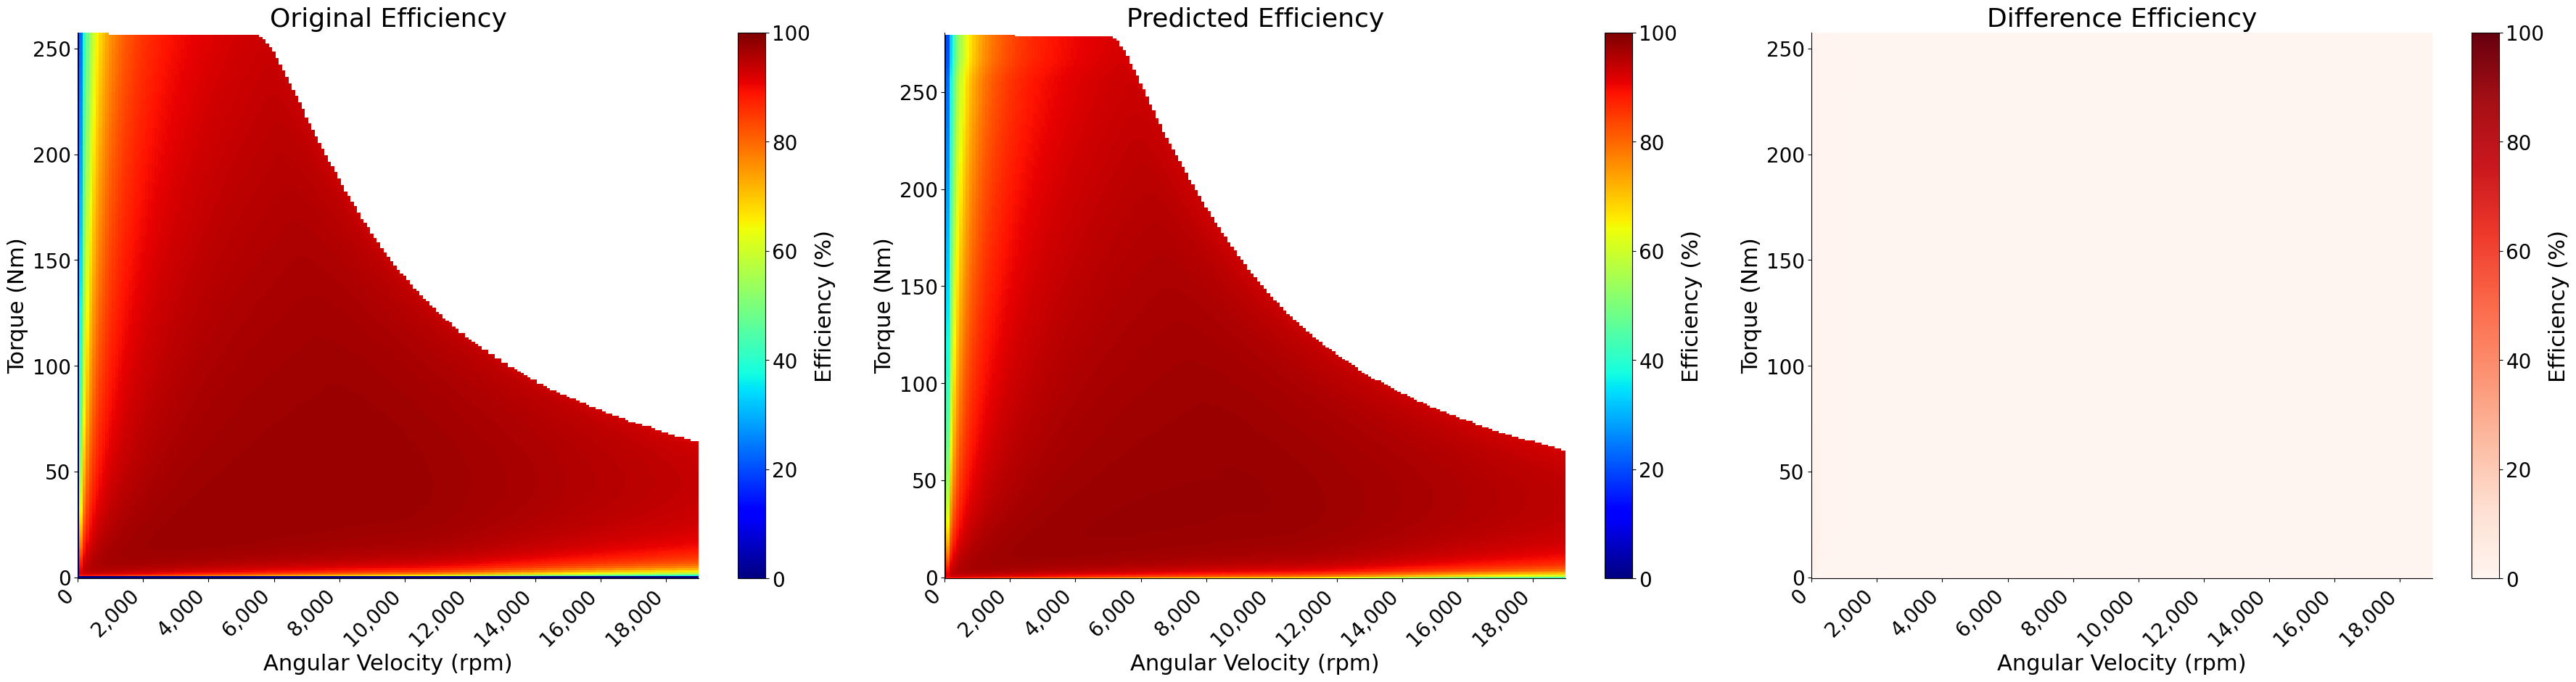

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from src.inference import eval_plot_kpi3d, eta_difference
from src.utils import read_file_1d, read_file_2d

nn_kpi_2d = list(range(0, 19100, 100))
nnkpi2darray = np.array(nn_kpi_2d)

start_index=0
max_index = 2

for index_no in range(start_index, max_index):
    
    filename_test = df_test_inputs.index[index_no]
    file_path = f'./data/raw/{filename_test}.xlsx'
    # file_path = f'./data/{filename_test}.xlsx'

    # Read Original MM and ETA data from the Excel file
    eta_kpi3d = read_file_2d(file_path, 'ETA')
    mm_input = read_file_1d(file_path, 'MM')
    mm_kpi3d  = np.array(mm_input[-eta_kpi3d.shape[0]:])
    
    eta_predicted = y2_grid_baseline
    mm_predicted = mm_matrix
    
    print(f"Sample {index_no}:")
    print(f"Original ETA shape: {eta_kpi3d.shape}")
    print(f"Predicted ETA shape: {eta_predicted.shape}")
    print(f"Original MM shape: {mm_kpi3d.shape}")
    print(f"Predicted MM shape: {mm_predicted.shape}")
    
    #Instead of creating a new figure for each plot, add to a grid
    plt.figure(figsize=(24, 20))  # Adjust figure size for all subplots

    mm_diff = mm_kpi3d if len(mm_kpi3d) <= len(mm_predicted) else mm_predicted
    
    eta_diff = eta_difference(eta_kpi3d, eta_predicted)
    # Plot the dual KPI 3D graph
    eval_plot_kpi3d(nnkpi2darray, mm_kpi3d, eta_kpi3d, mm_predicted, eta_predicted, mm_diff, eta_diff, filename_test)

plt.show()

In [ ]:
y2_grid_baseline.shape

(281, 191)

### Eval Statistics across specific NN for few samples

In [ ]:
speed_ranges = [20, 40, 60, 80, 100, 120, 140, 160, 180]

predicted_eta = []
target_eta = []

for speed in speed_ranges:
    predicted_eta_speed = y2_grid_baseline[:, speed]
    predicted_eta.append(predicted_eta_speed)

    target_eta_speed = [matrix[:, speed] for matrix in y2_test_grid[0:10]]
    target_eta.append(target_eta_speed)

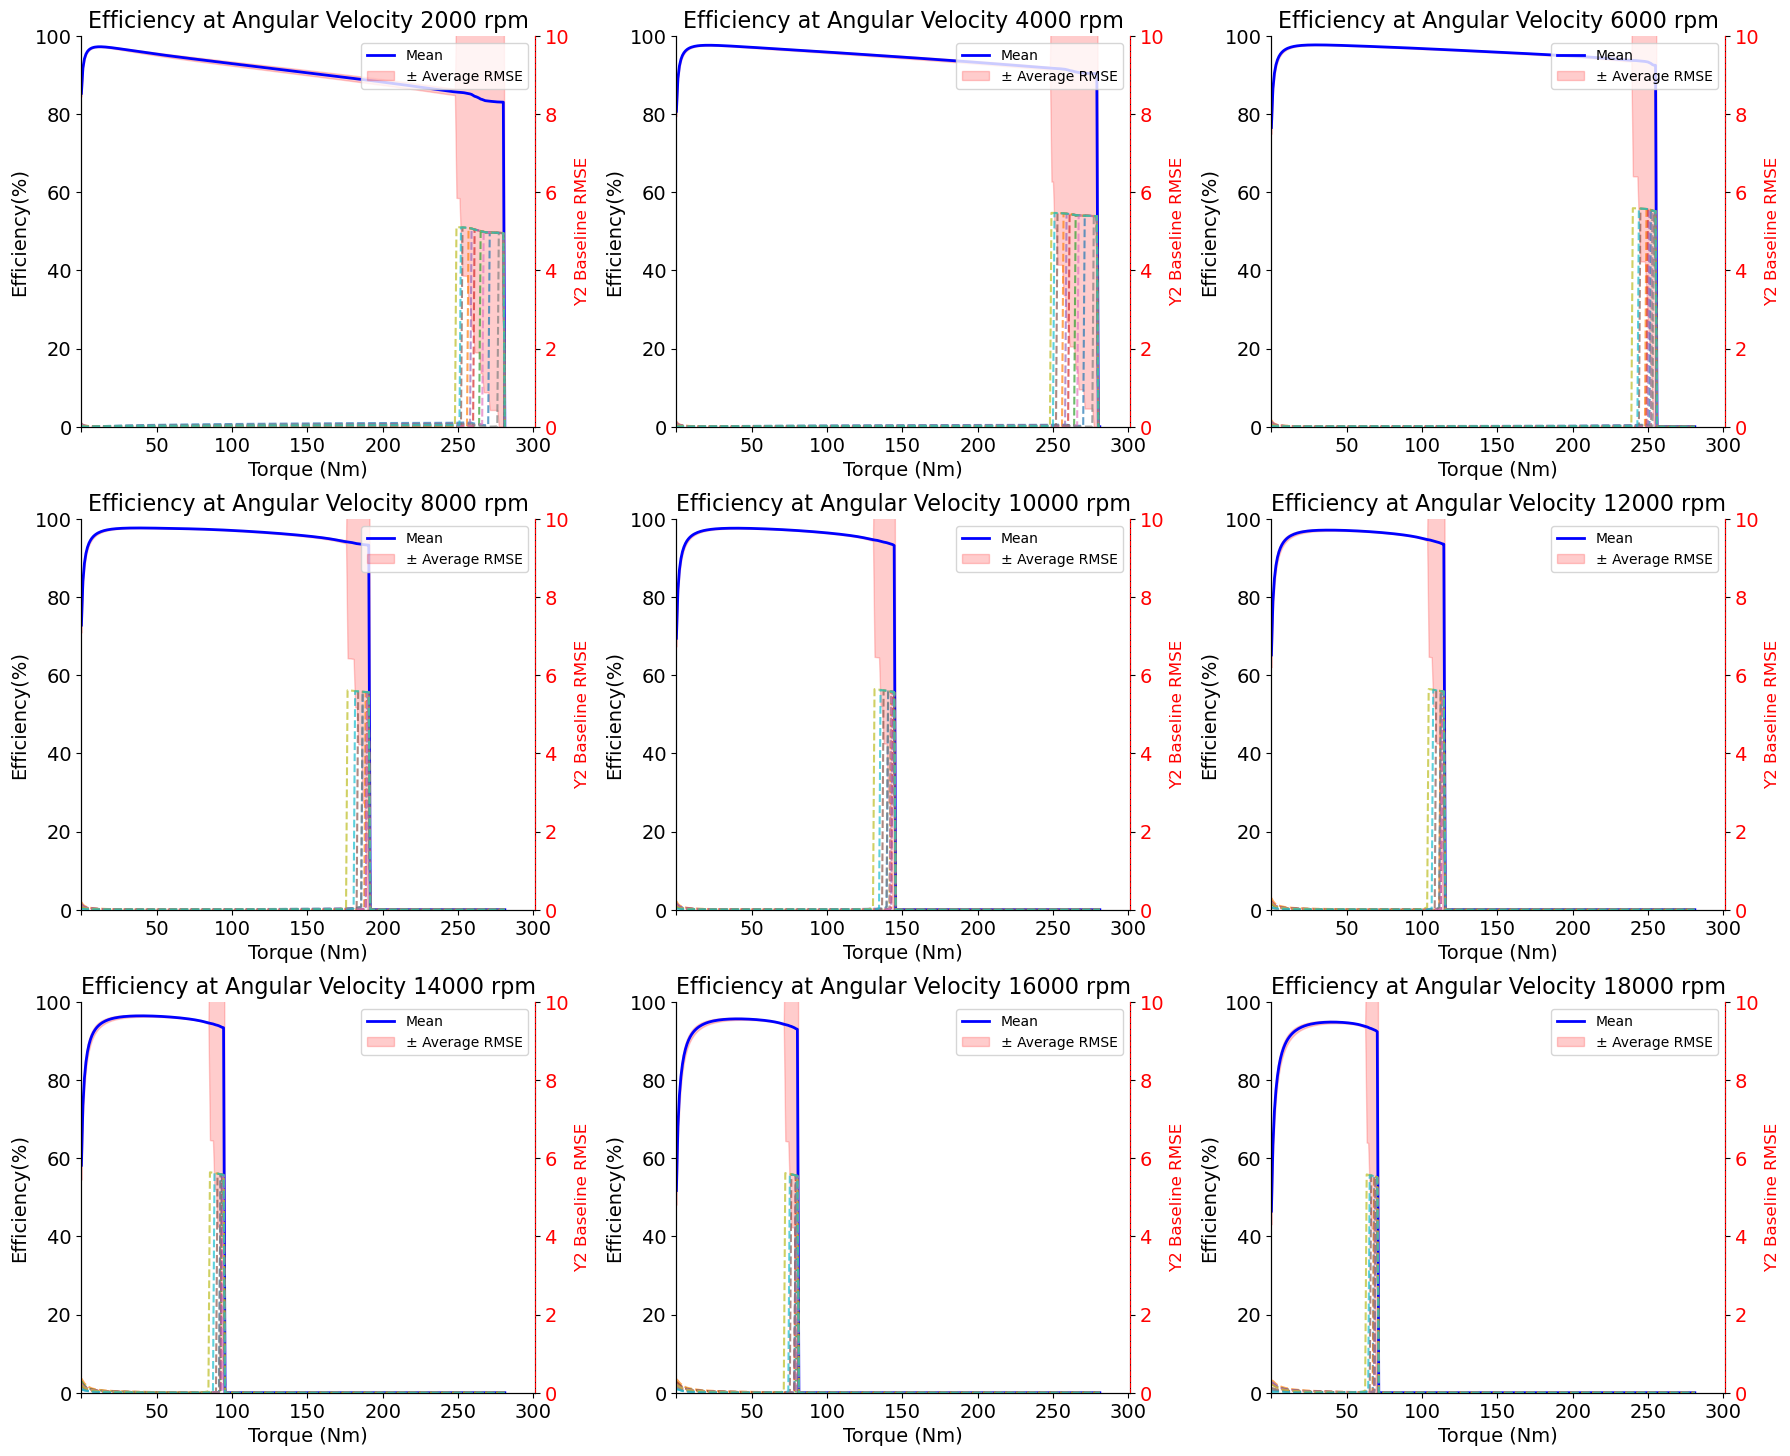

In [ ]:
from src.inference import plot_eta_statistics
plot_eta_statistics(predicted_eta, target_eta, speed_ranges, 'Baseline')

## For reporting

In [ ]:
from src.utils import plot_wandb_logs
import os
import pandas as pd

In [ ]:
dirpath = './Manuscript/wandb/loss'
metric = 'Loss'  # Metric to display on the y-axis

for file in os.listdir(dirpath):
    if file.endswith('.csv'):
        file_path = os.path.join(dirpath, file)
        df = pd.read_csv(file_path)

        # Ensure the DataFrame has the necessary columns before plotting
        if 'epoch' in df.columns:
            filename = os.path.splitext(file)[0]
            plot_wandb_logs(df, filename, metric)

In [ ]:
# Directory path containing the CSV files
dirpath = './Manuscript/wandb/score'
metric = 'Score'  # Metric to display on the y-axis

for file in os.listdir(dirpath):
    if file.endswith('.csv'):
        file_path = os.path.join(dirpath, file)
        df = pd.read_csv(file_path)

        # Ensure the DataFrame has the necessary columns before plotting
        if 'epoch' in df.columns:
            filename = os.path.splitext(file)[0]
            plot_wandb_logs(df, filename, metric)

In [ ]:
from src.utils import scoring_pdiff, pdiff_scoring
import joblib
min = 0
max = 100
percentage_diff = [15, 78, 34, 0, 100, 28] # Percentage difference

calculated_score = scoring_pdiff(percentage_diff, min, max)
print(f"The calculated score for a percentage difference of {percentage_diff} % relative to the range ({min}, {max}) is: {calculated_score}")


The calculated score for a percentage difference of [15, 78, 34, 0, 100, 28] % relative to the range (0, 100) is: [15.0, 78.0, 34.0, 0.0, 100.0, 28.000000000000004]


In [ ]:
min= joblib.load('./Intermediate/min_mgrenz.pkl')
max= joblib.load('./Intermediate/max_mgrenz.pkl')

# min= 0
# max= 100
# score = [14.155626408664798,
#  1.7276915001807462,
#  6.701236469749289,
#  2.416323332675984]
score=[91.3, 0, 231.16, 133.48000000000002, 58.0, 280.0]
percentage_diff = pdiff_scoring(score, min, max)

print(f"The percentage difference of the score {score} for the range ({min},{max}) is: {percentage_diff}%")

The percentage difference of the score [91.3, 0, 231.16, 133.48000000000002, 58.0, 280.0] for the range (56,280) is: [40.75892857142857, 0.0, 103.19642857142857, 59.58928571428572, 25.892857142857146, 125.0]%
